In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("aqi_data.csv")

In [4]:
df.head().T

,0,1,2,3,4
State,Andhra_Pradesh,Andhra_Pradesh,Andhra_Pradesh,Andhra_Pradesh,Andhra_Pradesh
City,Amaravati,Anantapur,Chittoor,Kadapa,Rajamahendravaram
Station_Name,"Secretariat, Amaravati - APPCB","Gulzarpet, Anantapur - APPCB","Gangineni Cheruvu, Chittoor - APPCB","Yerramukkapalli, Kadapa - APPCB","Anand Kala Kshetram, Rajamahendravaram - APPCB"
Last_Update,20-11-2023 12:00:00,20-11-2023 12:00:00,20-11-2023 12:00:00,20-11-2023 12:00:00,20-11-2023 12:00:00
Latitude,16.515083,14.675886,13.20488,14.465052,16.987287
Longitude,80.518167,77.593027,79.097889,78.824187,81.736318
PM2.5_Min,NaN,15.0,11.0,19.0,31.0
PM2.5_Max,NaN,34.0,30.0,57.0,72.0
PM2.5_Avg,NaN,24.0,19.0,37.0,44.0
PM10_Min,NaN,16.0,13.0,18.0,43.0


<h1>Information</h1>

In [19]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  492 non-null    object 
 1   City                   492 non-null    object 
 2   Station_Name           492 non-null    object 
 3   Last_Update            492 non-null    object 
 4   Latitude               492 non-null    float64
 5   Longitude              492 non-null    float64
 6   PM2.5_Min              448 non-null    float64
 7   PM2.5_Max              448 non-null    float64
 8   PM2.5_Avg              448 non-null    float64
 9   PM10_Min               442 non-null    float64
 10  PM10_Max               442 non-null    float64
 11  PM10_Avg               442 non-null    float64
 12  SO2_Min                431 non-null    float64
 13  SO2_Max                431 non-null    float64
 14  SO2_Avg                431 non-null    float64
 15  CO_Min

<h1>Deal With Missing Values</h1>

In [9]:
s = df.isnull().sum()

State                     0
City                      0
Station_Name              0
Last_Update               0
Latitude                  0
Longitude                 0
PM2.5_Min                44
PM2.5_Max                44
PM2.5_Avg                44
PM10_Min                 50
PM10_Max                 50
PM10_Avg                 50
SO2_Min                  61
SO2_Max                  61
SO2_Avg                  61
CO_Min                   33
CO_Max                   33
CO_Avg                   33
OZONE_Min                42
OZONE_Max                42
OZONE_Avg                42
AQI_Value                38
Predominant_Parameter    38
NO2_Min                  50
NO2_Max                  50
NO2_Avg                  50
NH3_Min                  99
NH3_Max                  99
NH3_Avg                  99
dtype: int64

<h1>Identifying Duplicate Values</h1>

In [23]:
df.duplicated().sum()

np.int64(0)

Identifying garbage values

In [26]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("**"*10)

State
Maharashtra         84
Uttar_Pradesh       53
Rajasthan           45
Karnataka           40
Delhi               38
Bihar               33
Haryana             30
Madhya Pradesh      23
TamilNadu           20
Odisha              18
Gujarat             17
West_Bengal         14
Telangana           14
Chhattisgarh        12
Andhra_Pradesh      11
Assam                9
Punjab               8
Kerala               6
Chandigarh           3
Uttarakhand          3
Meghalaya            2
Mizoram              1
Nagaland             1
Puducherry           1
Jharkhand            1
Sikkim               1
Jammu_&_Kashmir      1
Himachal Pradesh     1
Tripura              1
Manipur              1
Name: count, dtype: int64
********************
City
Delhi         38
Mumbai        28
Hyderabad     14
Bengaluru     13
Ahmedabad      9
              ..
Tumakuru       1
Udupi          1
Vijayapura     1
Yadgir         1
Siliguri       1
Name: count, Length: 264, dtype: int64
********************
Stati

<h1>Exploratory Data Analysis(EDA)</h1>

Descriptive Statistics

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,492.0,22.746053,5.470420,8.514909,19.059767,23.415945,27.213974,34.066206
Longitude,492.0,78.454599,4.771044,70.909168,75.507959,77.299320,80.252921,94.636574
PM2.5_Min,448.0,82.220982,72.059557,1.000000,31.000000,57.500000,108.000000,357.000000
PM2.5_Max,448.0,230.982143,139.724544,20.000000,94.000000,229.000000,337.250000,500.000000
PM2.5_Avg,448.0,151.852679,105.825806,10.000000,63.000000,122.500000,232.500000,416.000000
PM10_Min,442.0,78.900452,41.891438,4.000000,44.000000,75.000000,109.750000,226.000000
PM10_Max,442.0,212.547511,133.251944,22.000000,114.250000,166.000000,298.750000,500.000000
PM10_Avg,442.0,132.361991,76.433661,16.000000,78.000000,117.000000,167.750000,419.000000
SO2_Min,431.0,10.491879,12.724059,1.000000,3.000000,7.000000,13.000000,112.000000
SO2_Max,431.0,27.180974,24.533977,1.000000,11.000000,18.000000,36.000000,133.000000


In [29]:
df.describe(include="object")

,State,City,Station_Name,Last_Update,Predominant_Parameter
count,492,492,492,492,454
unique,30,264,492,1,6
top,Maharashtra,Delhi,"Secretariat, Amaravati - APPCB",20-11-2023 12:00:00,PM2.5
freq,84,38,1,492,244


Histogram

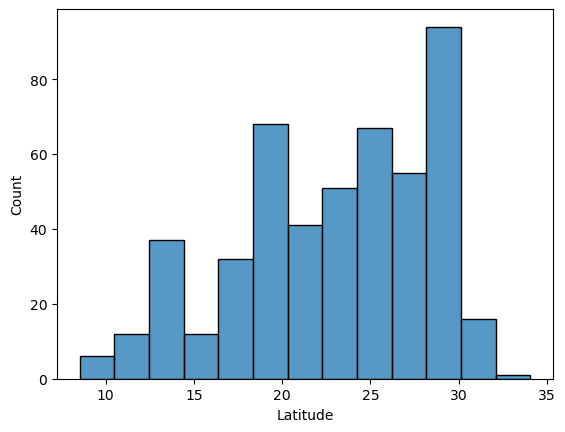

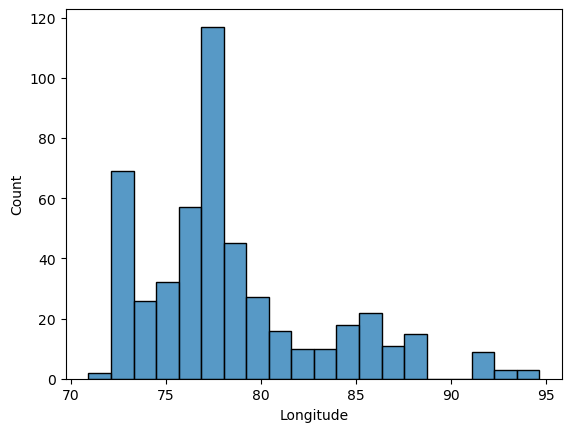

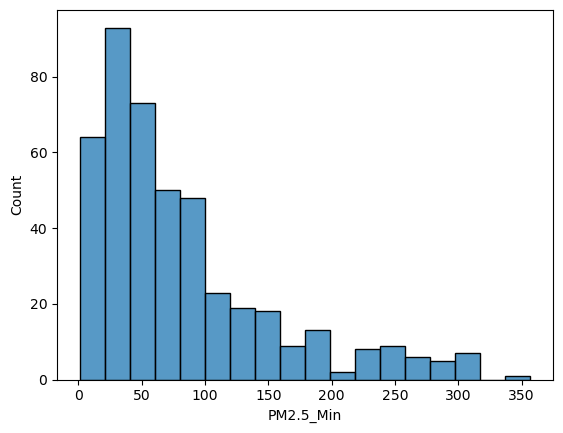

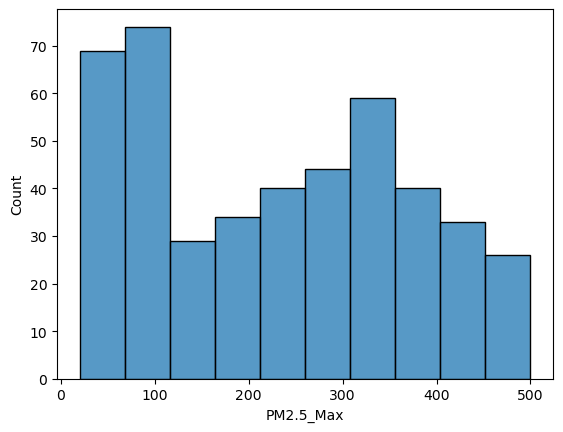

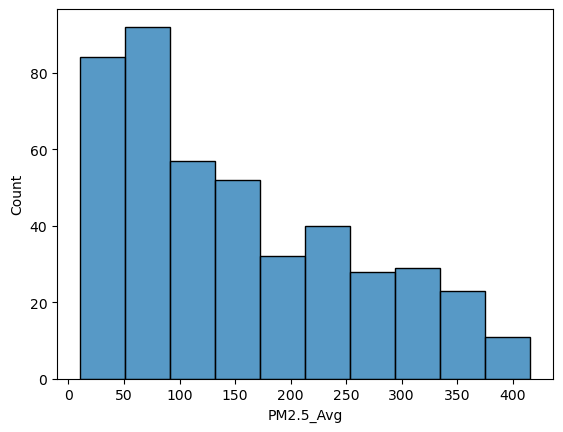

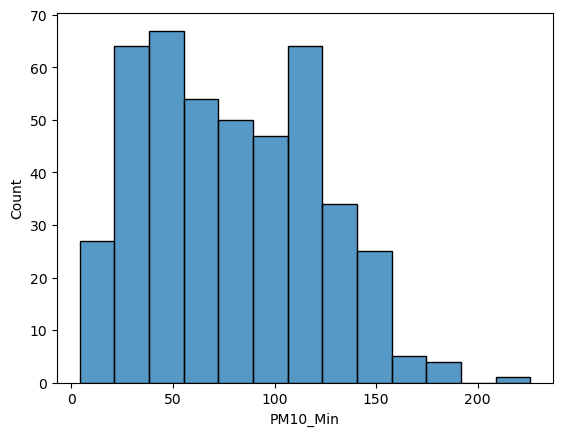

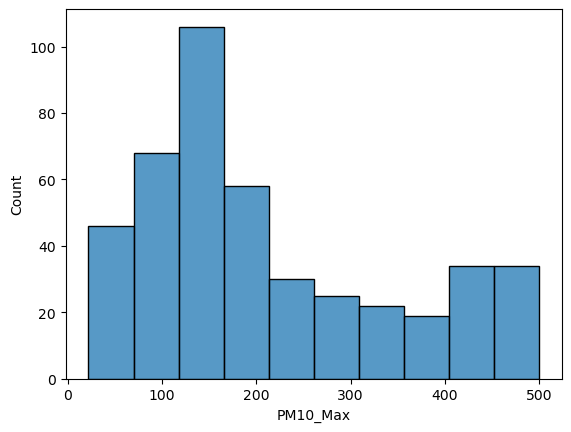

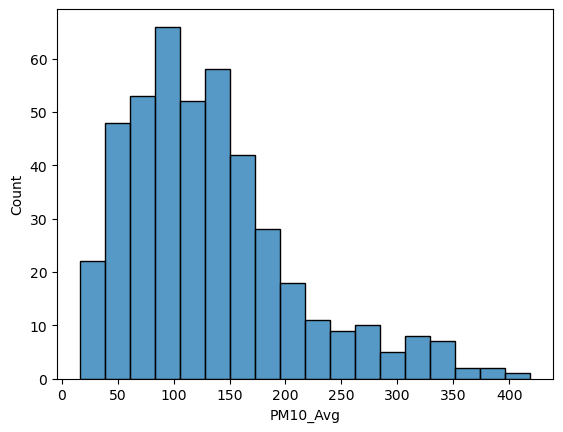

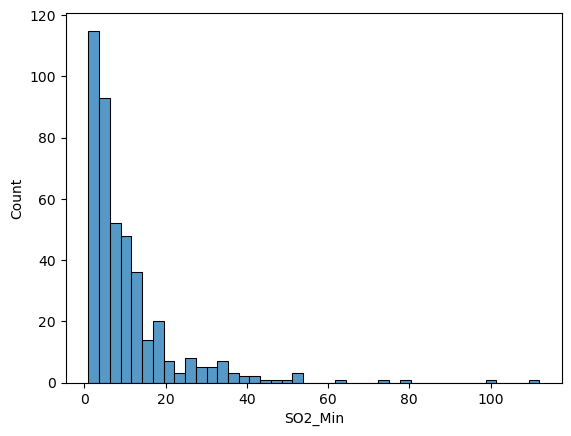

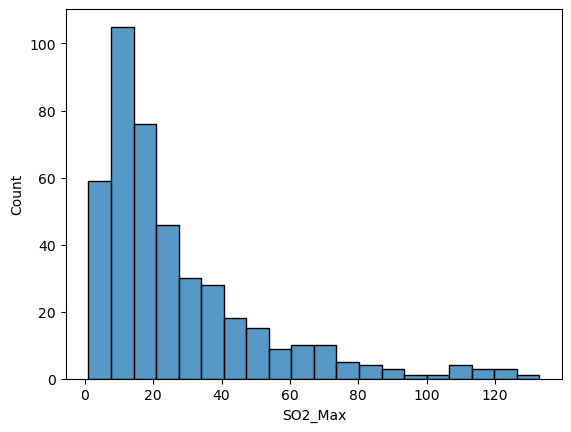

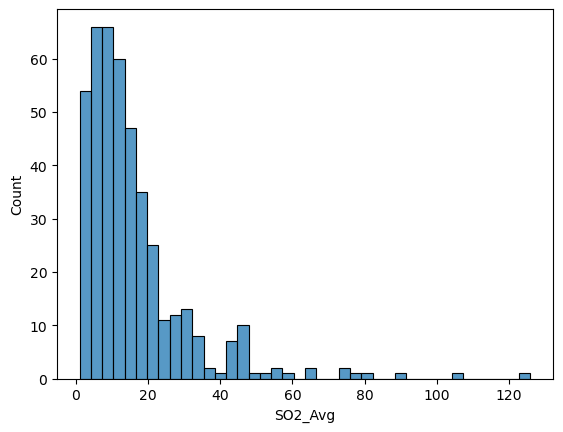

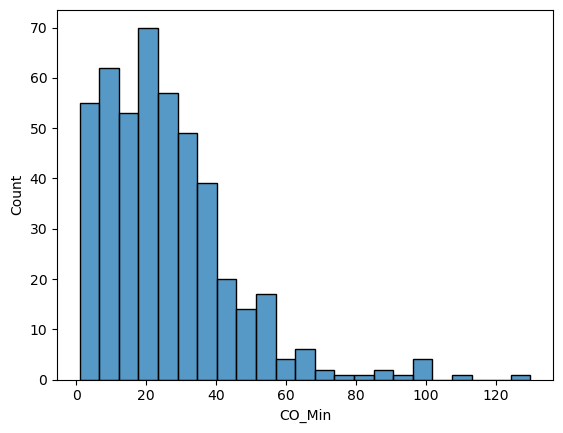

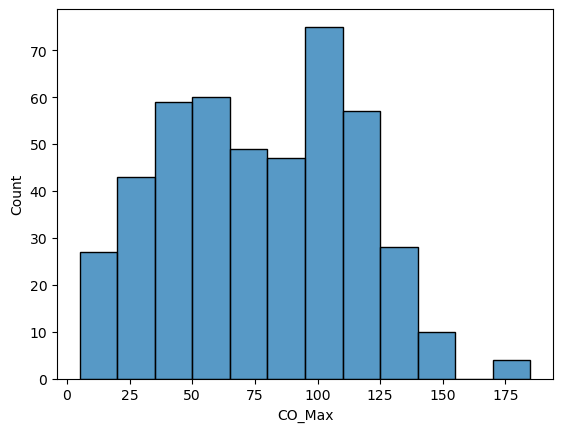

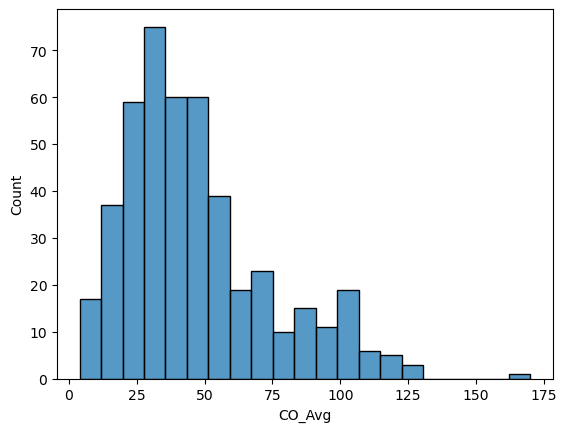

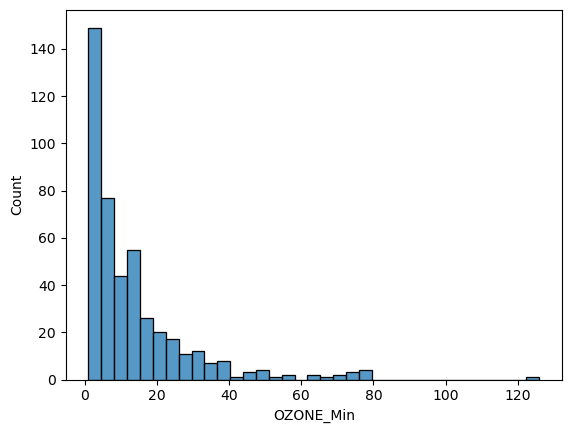

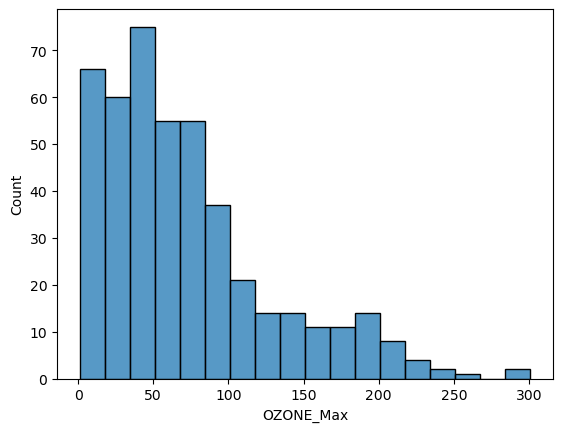

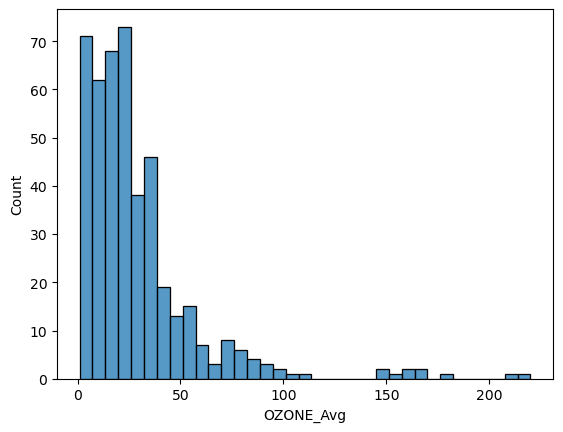

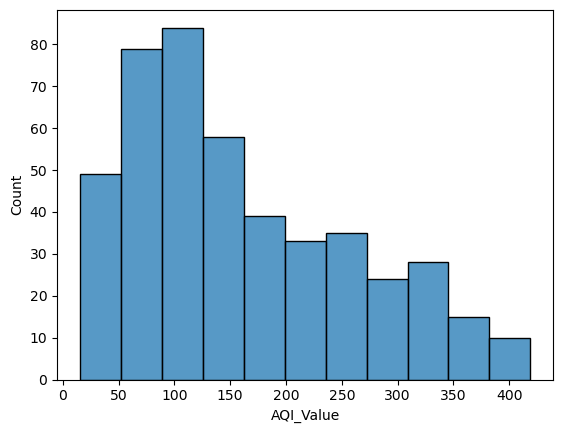

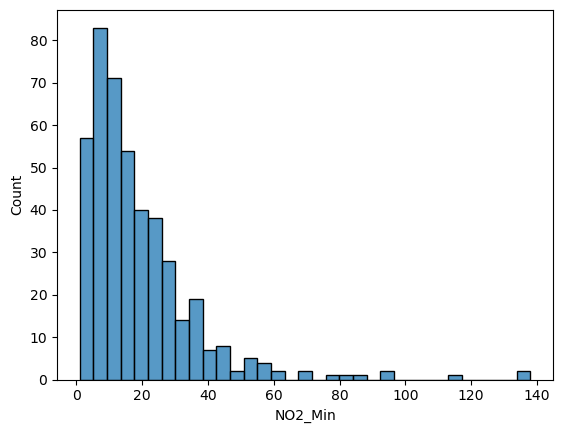

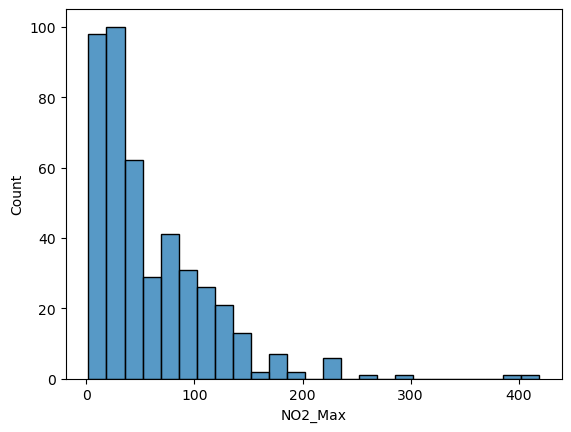

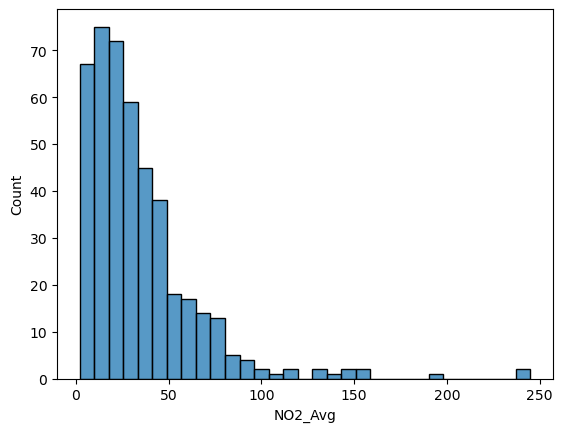

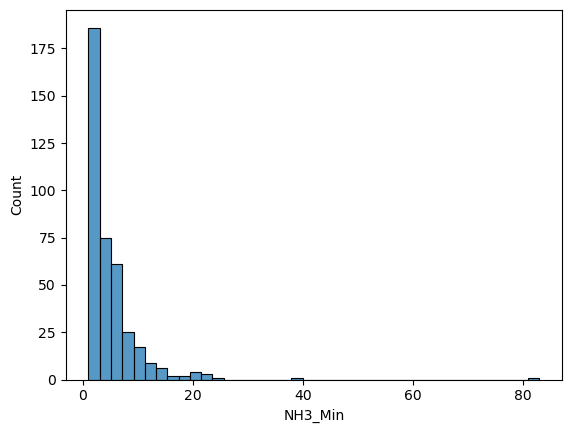

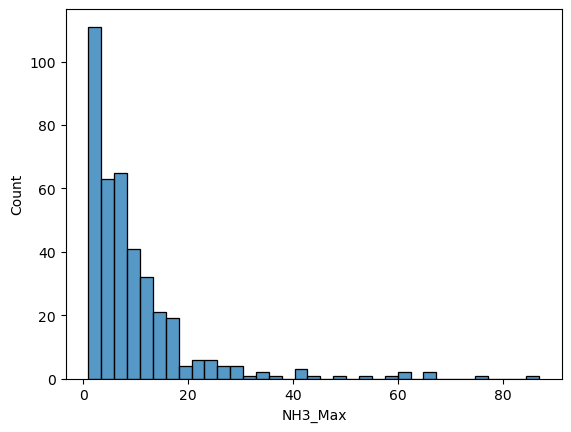

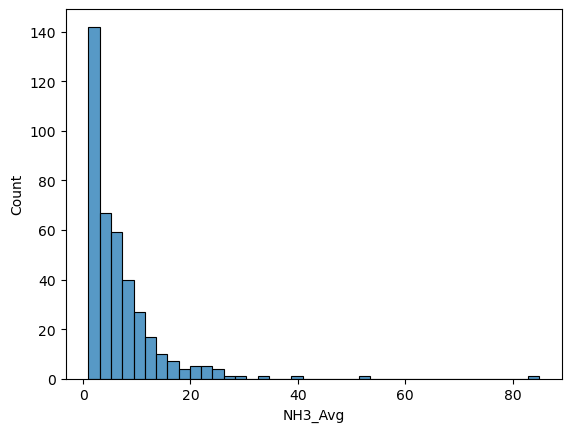

In [35]:
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

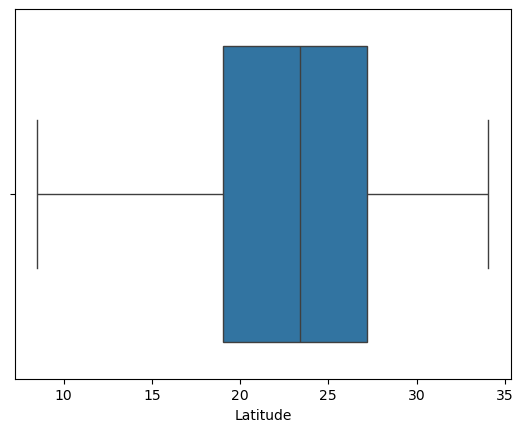

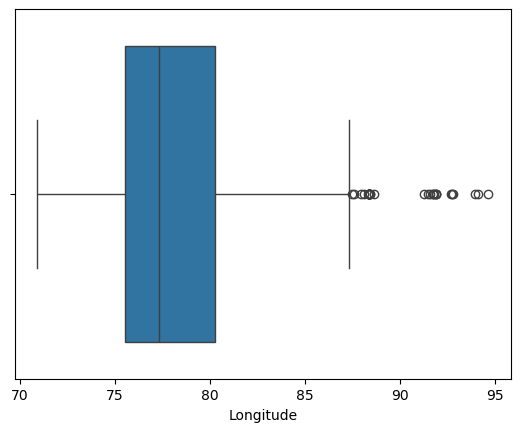

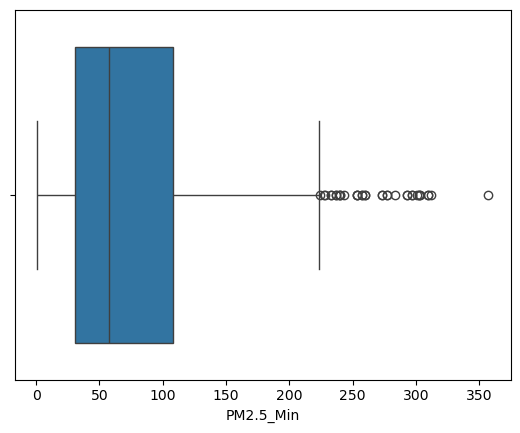

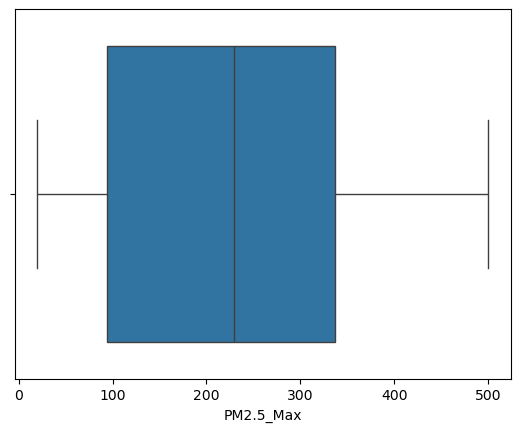

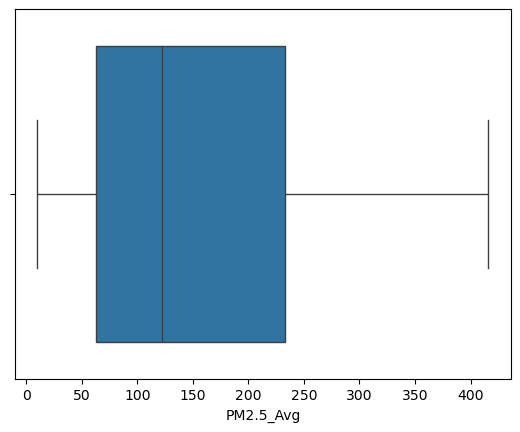

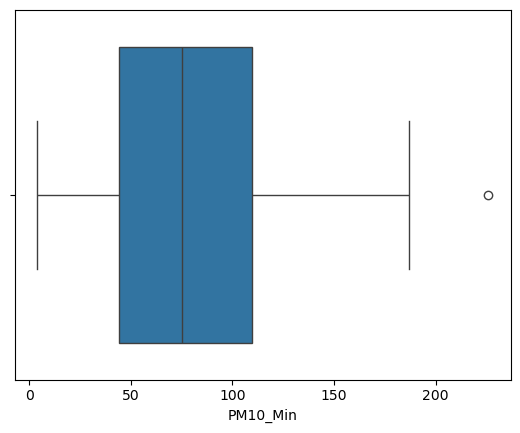

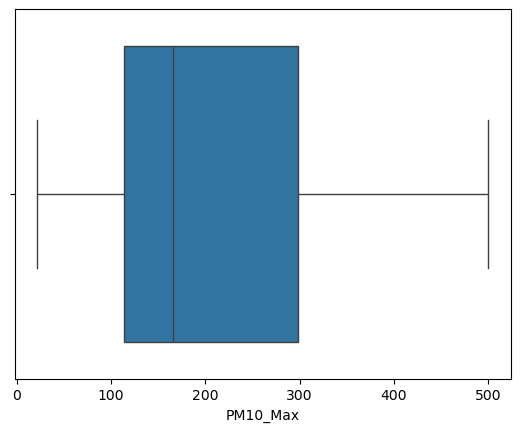

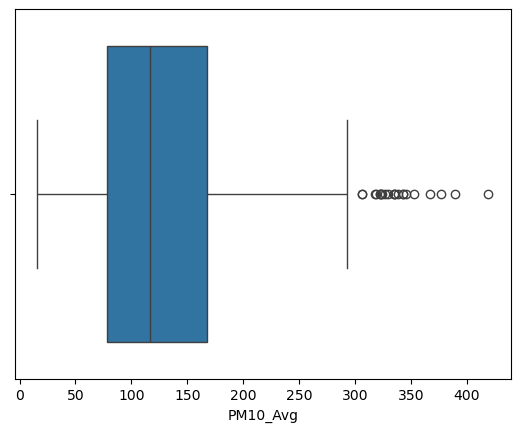

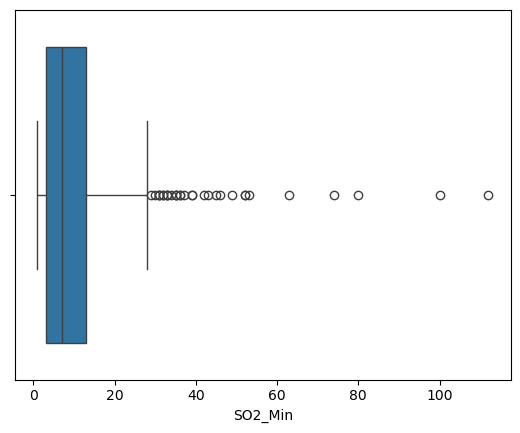

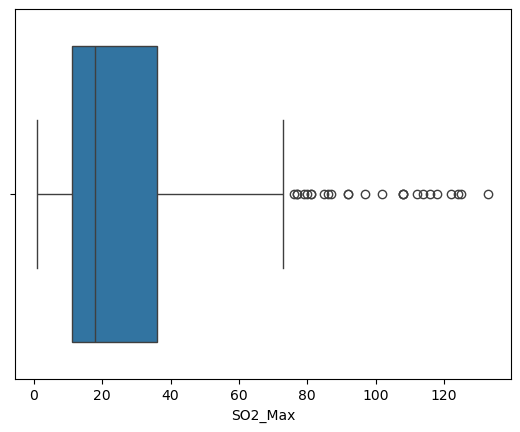

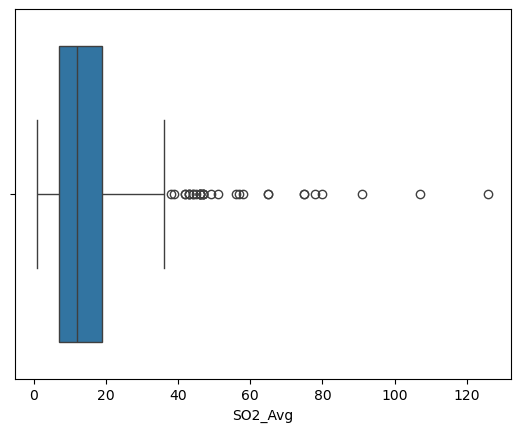

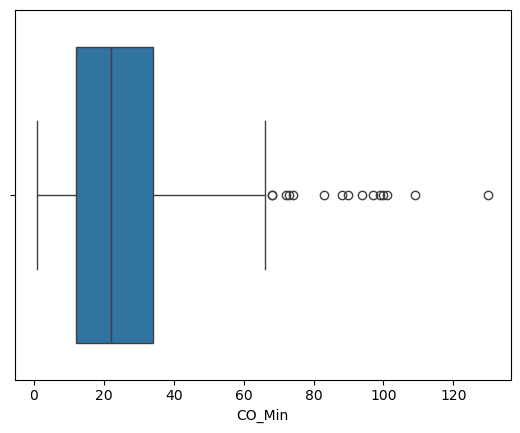

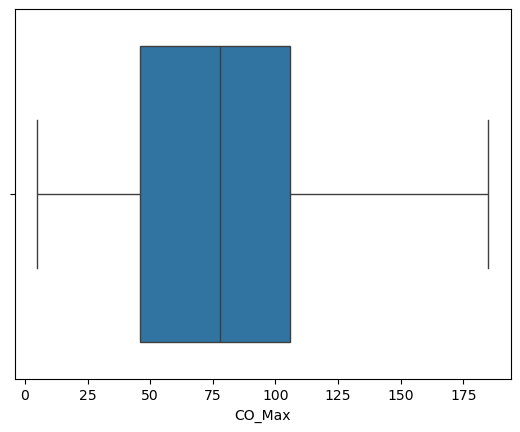

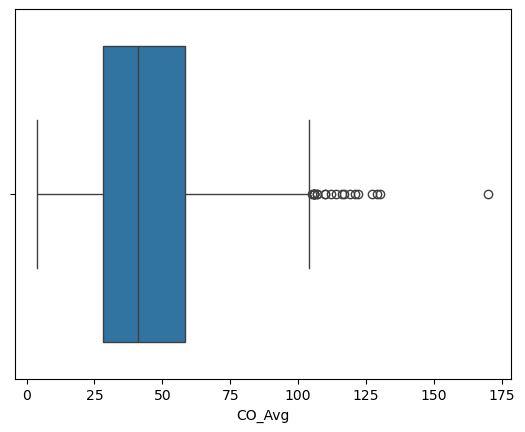

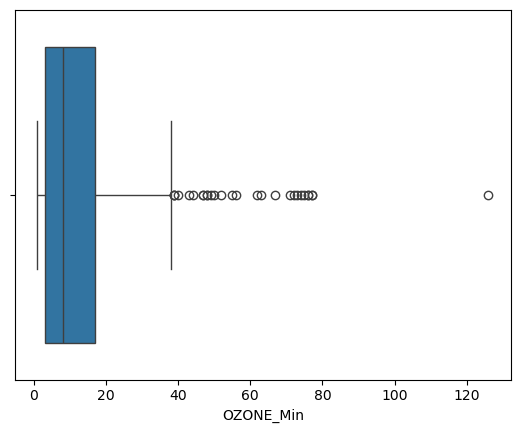

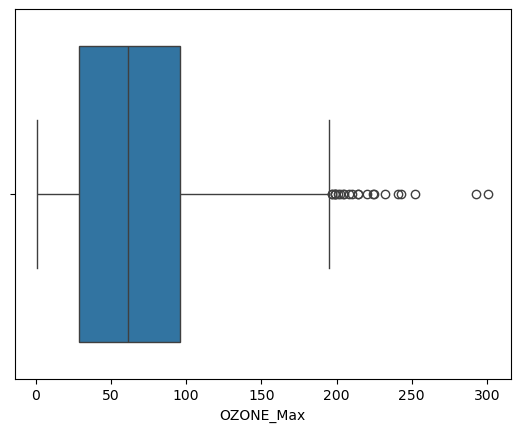

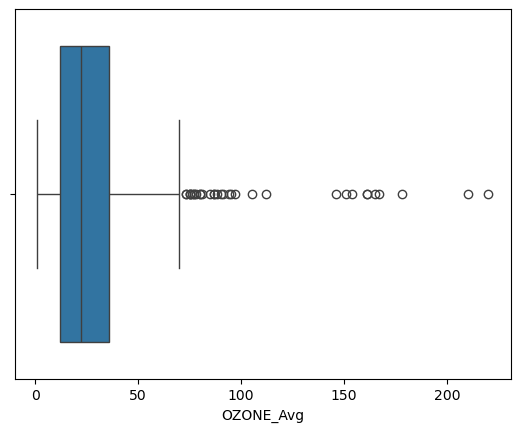

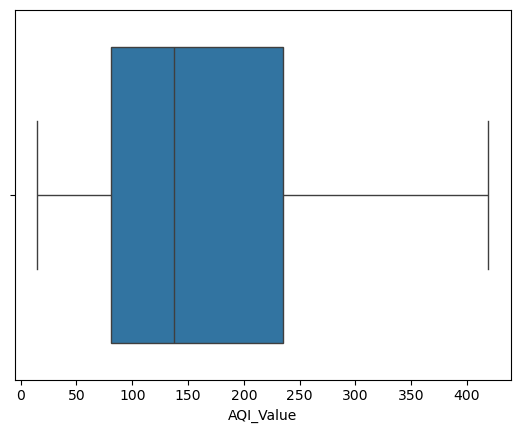

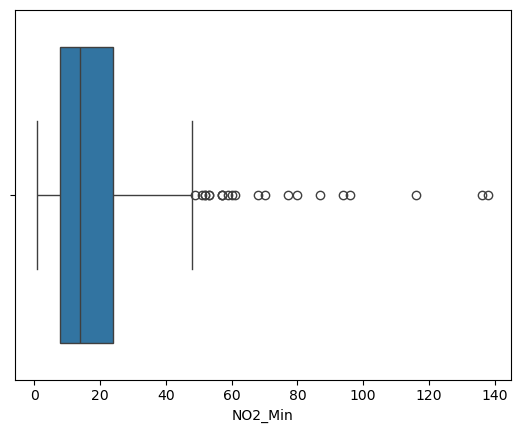

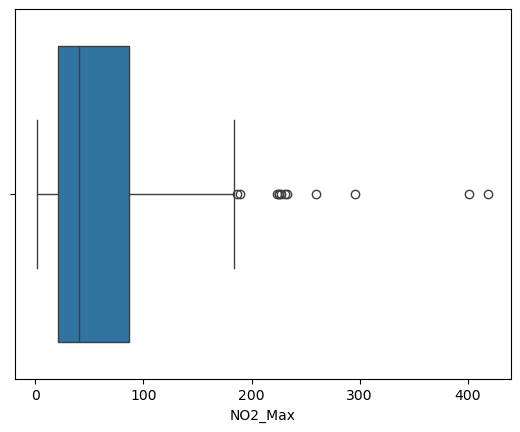

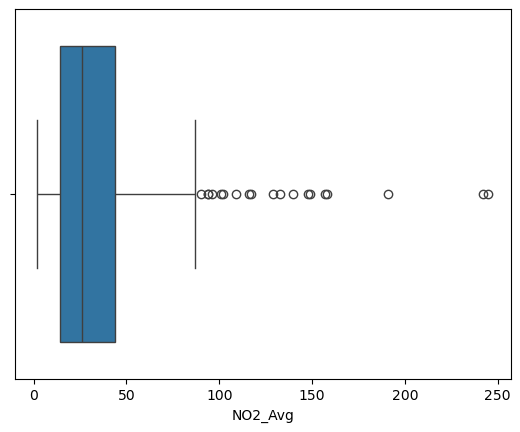

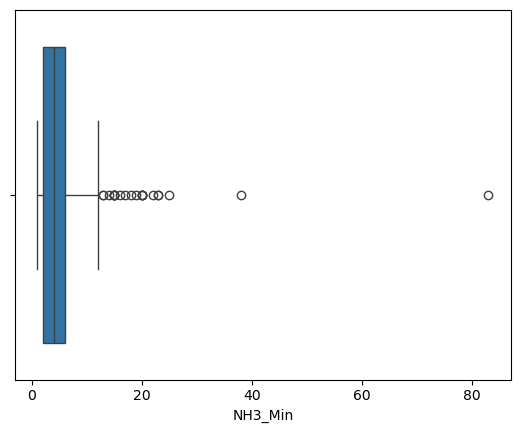

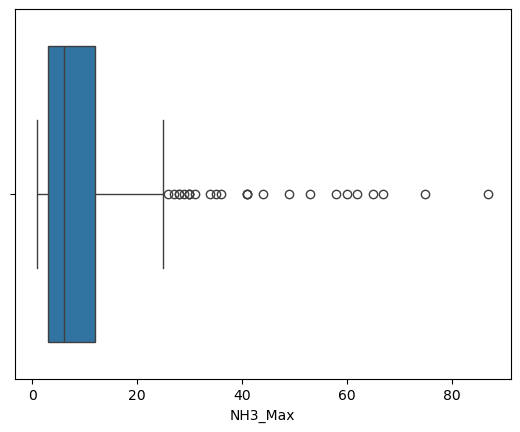

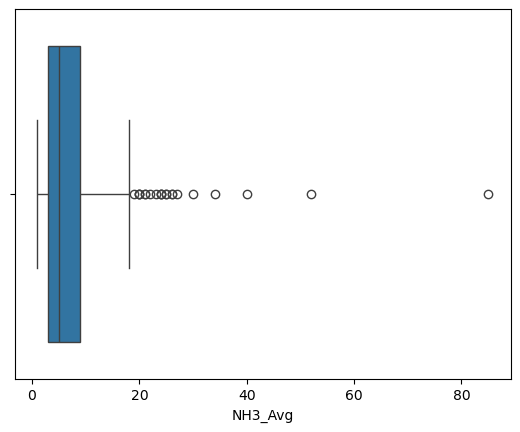

In [13]:
#boxplot to show outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [19]:
df.select_dtypes(include="object").T


,0,1,2,3,4,5,6,7,8,9,...,482,483,484,485,486,487,488,489,490,491
State,Andhra_Pradesh,Andhra_Pradesh,Andhra_Pradesh,Andhra_Pradesh,Andhra_Pradesh,Andhra_Pradesh,Andhra_Pradesh,Andhra_Pradesh,Andhra_Pradesh,Andhra_Pradesh,...,West_Bengal,West_Bengal,West_Bengal,West_Bengal,West_Bengal,West_Bengal,West_Bengal,West_Bengal,West_Bengal,West_Bengal
City,Amaravati,Anantapur,Chittoor,Kadapa,Rajamahendravaram,Tirupati,Tirupati,Vijayawada,Vijayawada,Vijayawada,...,Howrah,Howrah,Kolkata,Kolkata,Kolkata,Kolkata,Kolkata,Kolkata,Kolkata,Siliguri
Station_Name,"Secretariat, Amaravati - APPCB","Gulzarpet, Anantapur - APPCB","Gangineni Cheruvu, Chittoor - APPCB","Yerramukkapalli, Kadapa - APPCB","Anand Kala Kshetram, Rajamahendravaram - APPCB","Tirumala, Tirupati - APPCB","Vaikuntapuram, Tirupati - APPCB","HB Colony, Vijayawada - APPCB","Kanuru, Vijayawada - APPCB","Rajiv Gandhi Park, Vijayawada - APPCB",...,"Ghusuri, Howrah - WBPCB","Padmapukur, Howrah - WBPCB","Ballygunge, Kolkata - WBPCB","Bidhannagar, Kolkata - WBPCB","Fort William, Kolkata - WBPCB","Jadavpur, Kolkata - WBPCB","Rabindra Bharati University, Kolkata - WBPCB","Rabindra Sarobar, Kolkata - WBPCB","Victoria, Kolkata - WBPCB","Ward-32 Bapupara, Siliguri - WBPCB"
Last_Update,20-11-2023 12:00:00,20-11-2023 12:00:00,20-11-2023 12:00:00,20-11-2023 12:00:00,20-11-2023 12:00:00,20-11-2023 12:00:00,20-11-2023 12:00:00,20-11-2023 12:00:00,20-11-2023 12:00:00,20-11-2023 12:00:00,...,20-11-2023 12:00:00,20-11-2023 12:00:00,20-11-2023 12:00:00,20-11-2023 12:00:00,20-11-2023 12:00:00,20-11-2023 12:00:00,20-11-2023 12:00:00,20-11-2023 12:00:00,20-11-2023 12:00:00,20-11-2023 12:00:00
Predominant_Parameter,NaN,CO,OZONE,PM2.5,PM10,PM2.5,CO,PM2.5,CO,OZONE,...,PM2.5,PM10,PM10,PM10,PM2.5,PM10,PM10,PM2.5,PM10,PM10


In [21]:
df.select_dtypes(include="number").columns

Index(['Latitude', 'Longitude', 'PM2.5_Min', 'PM2.5_Max', 'PM2.5_Avg',
       'PM10_Min', 'PM10_Max', 'PM10_Avg', 'SO2_Min', 'SO2_Max', 'SO2_Avg',
       'CO_Min', 'CO_Max', 'CO_Avg', 'OZONE_Min', 'OZONE_Max', 'OZONE_Avg',
       'AQI_Value', 'NO2_Min', 'NO2_Max', 'NO2_Avg', 'NH3_Min', 'NH3_Max',
       'NH3_Avg'],
      dtype='object')

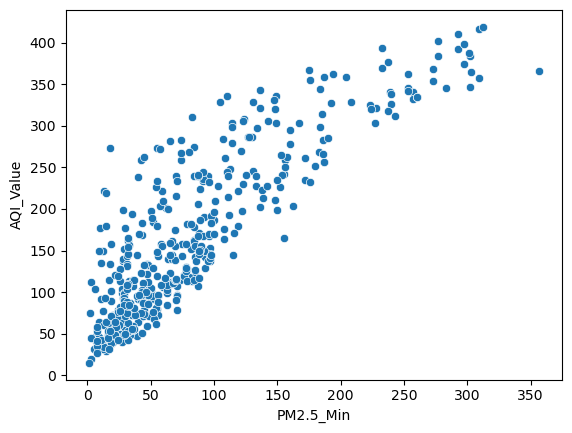

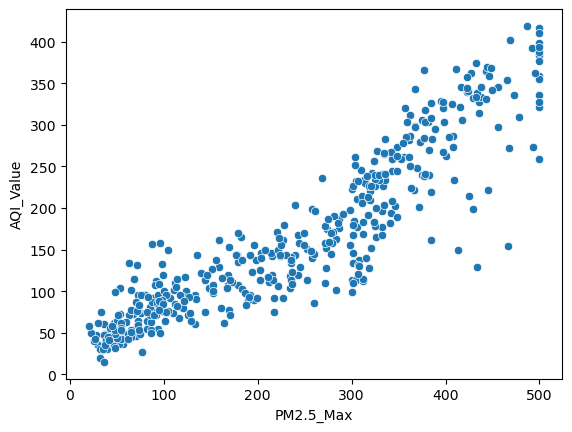

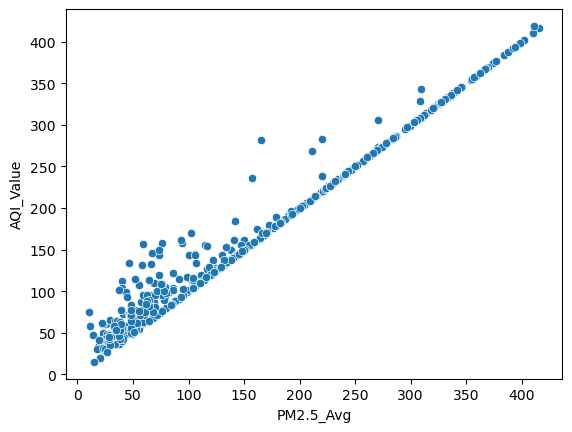

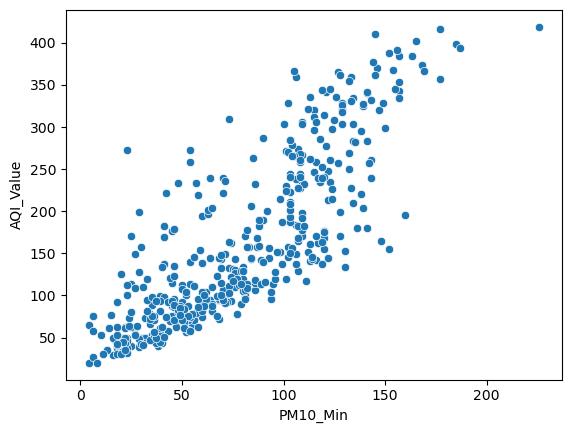

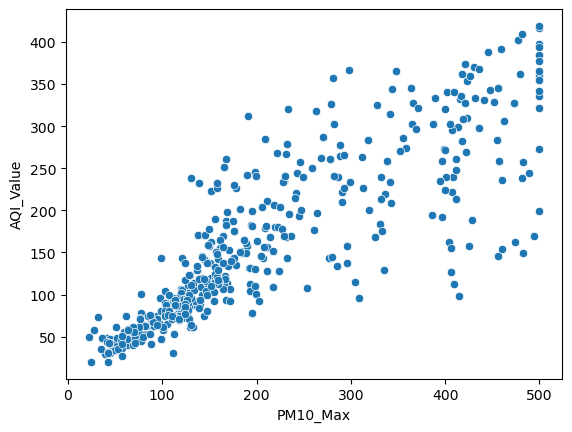

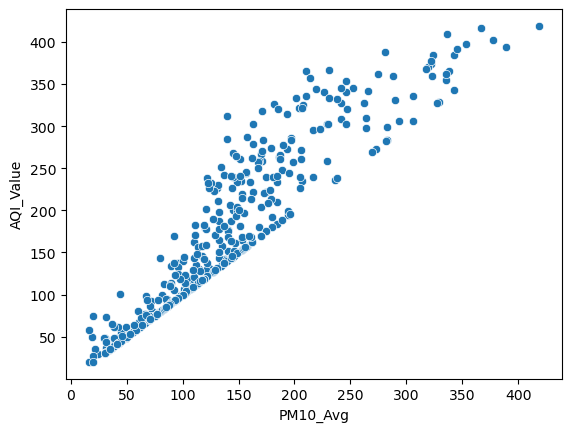

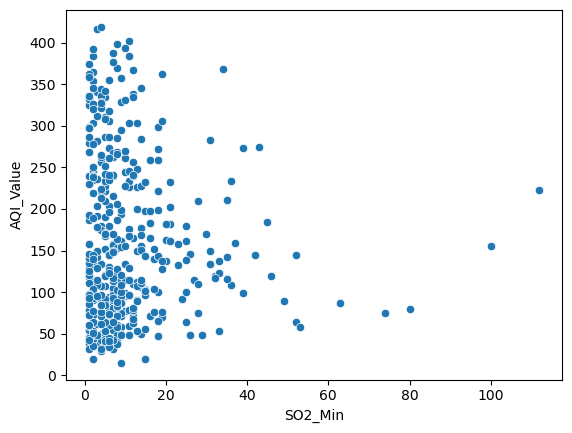

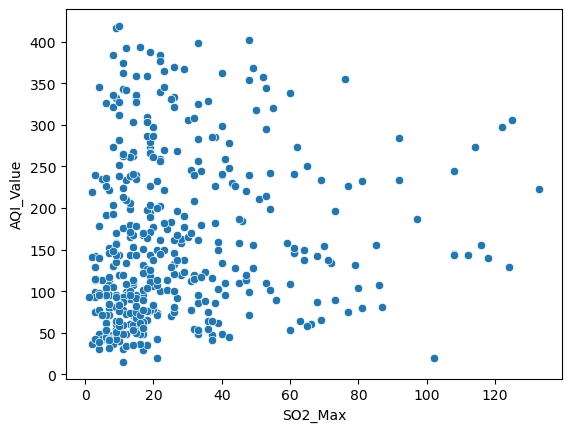

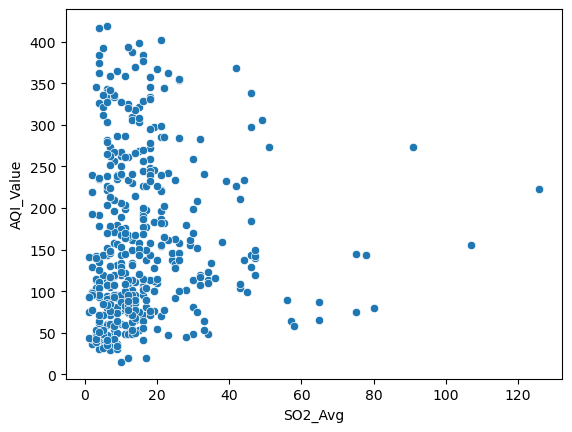

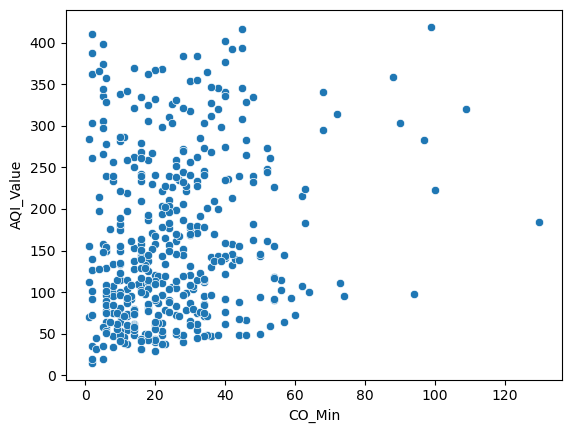

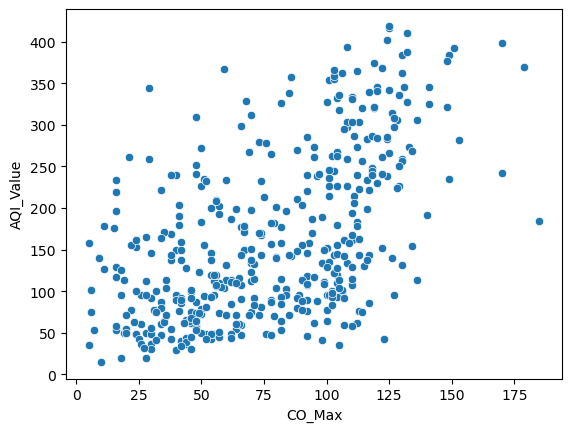

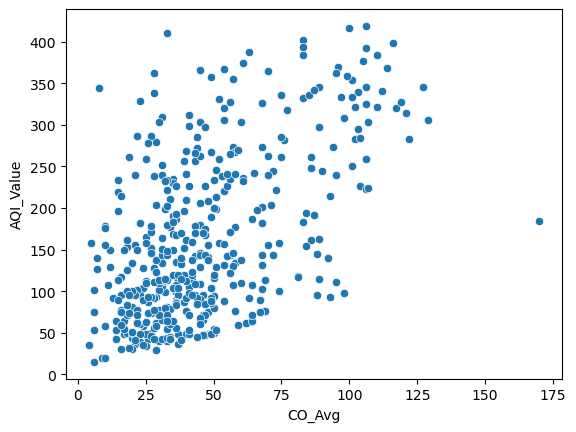

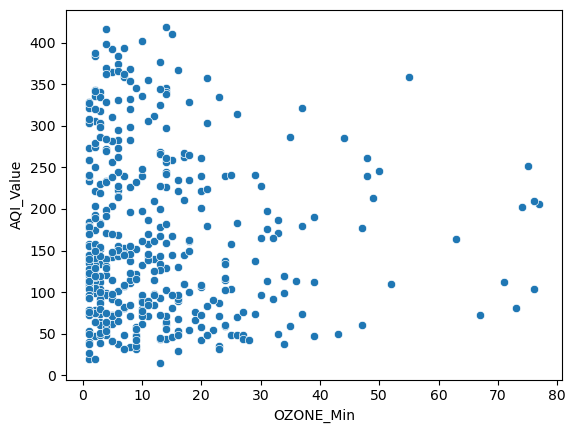

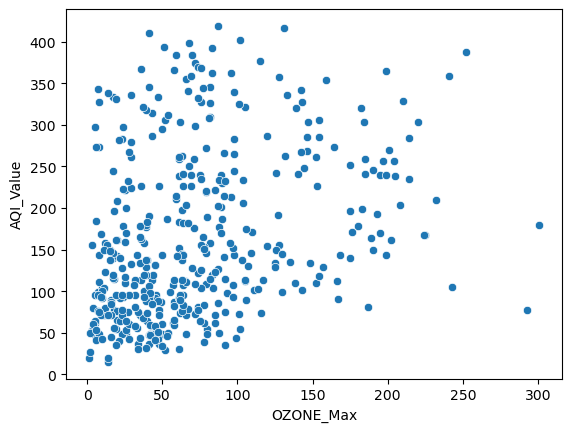

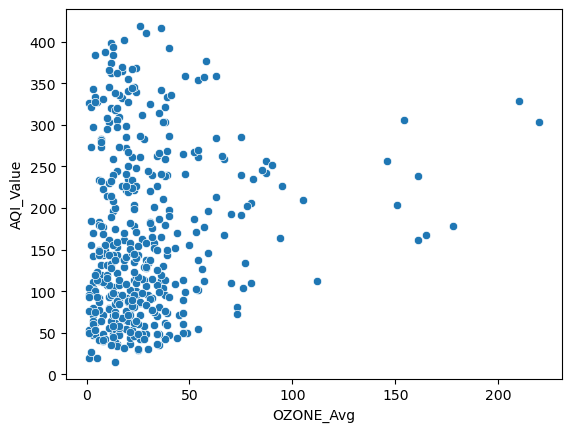

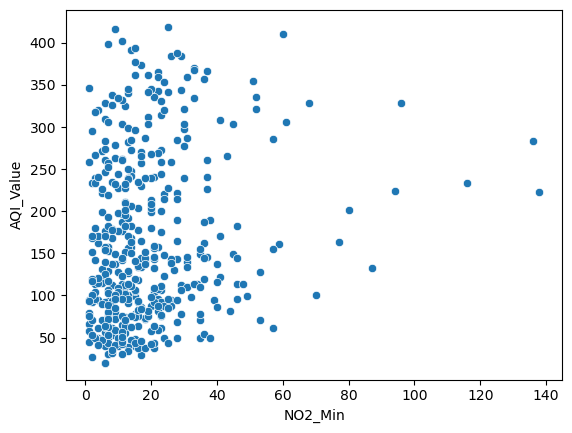

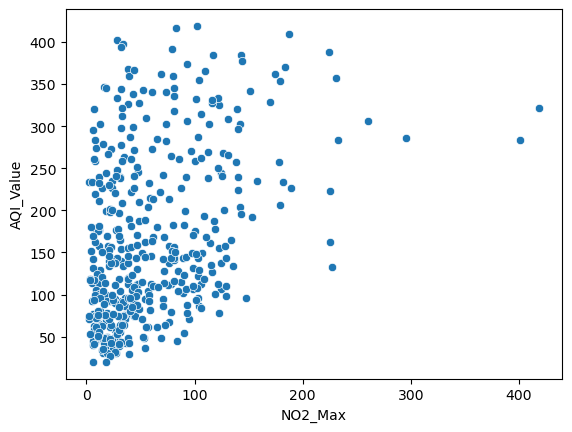

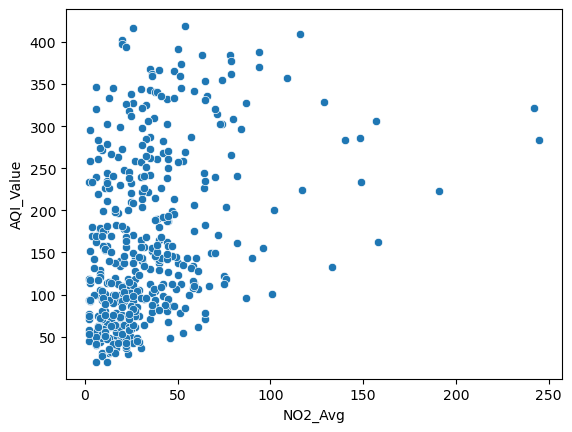

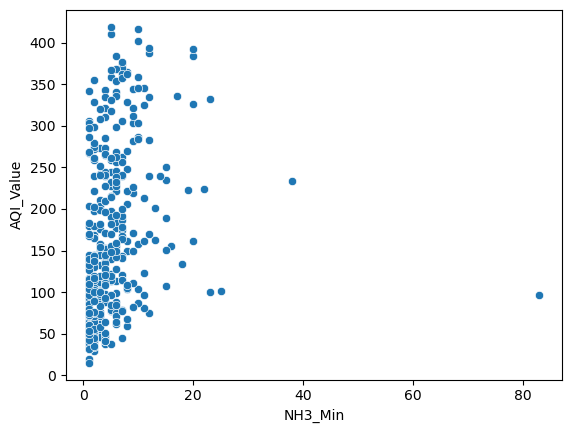

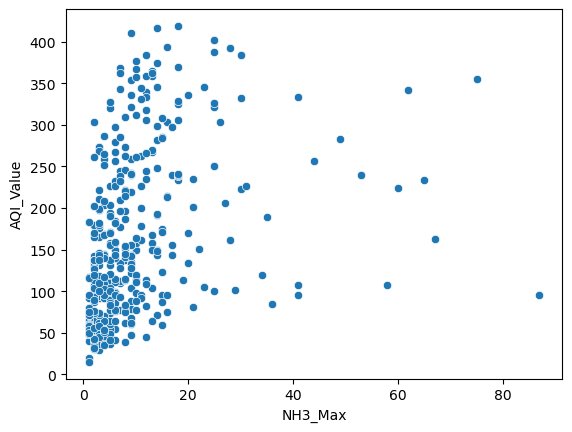

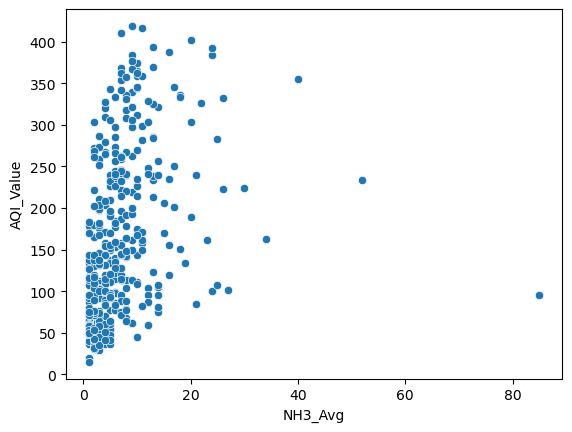

In [23]:
for i in ['PM2.5_Min', 'PM2.5_Max', 'PM2.5_Avg',
       'PM10_Min', 'PM10_Max', 'PM10_Avg', 'SO2_Min', 'SO2_Max', 'SO2_Avg',
       'CO_Min', 'CO_Max', 'CO_Avg', 'OZONE_Min', 'OZONE_Max', 'OZONE_Avg',
        'NO2_Min', 'NO2_Max', 'NO2_Avg', 'NH3_Min', 'NH3_Max',
       'NH3_Avg']:
    sns.scatterplot(data=df,x=i,y='AQI_Value')
    plt.show()

Correlation 

<Axes: >

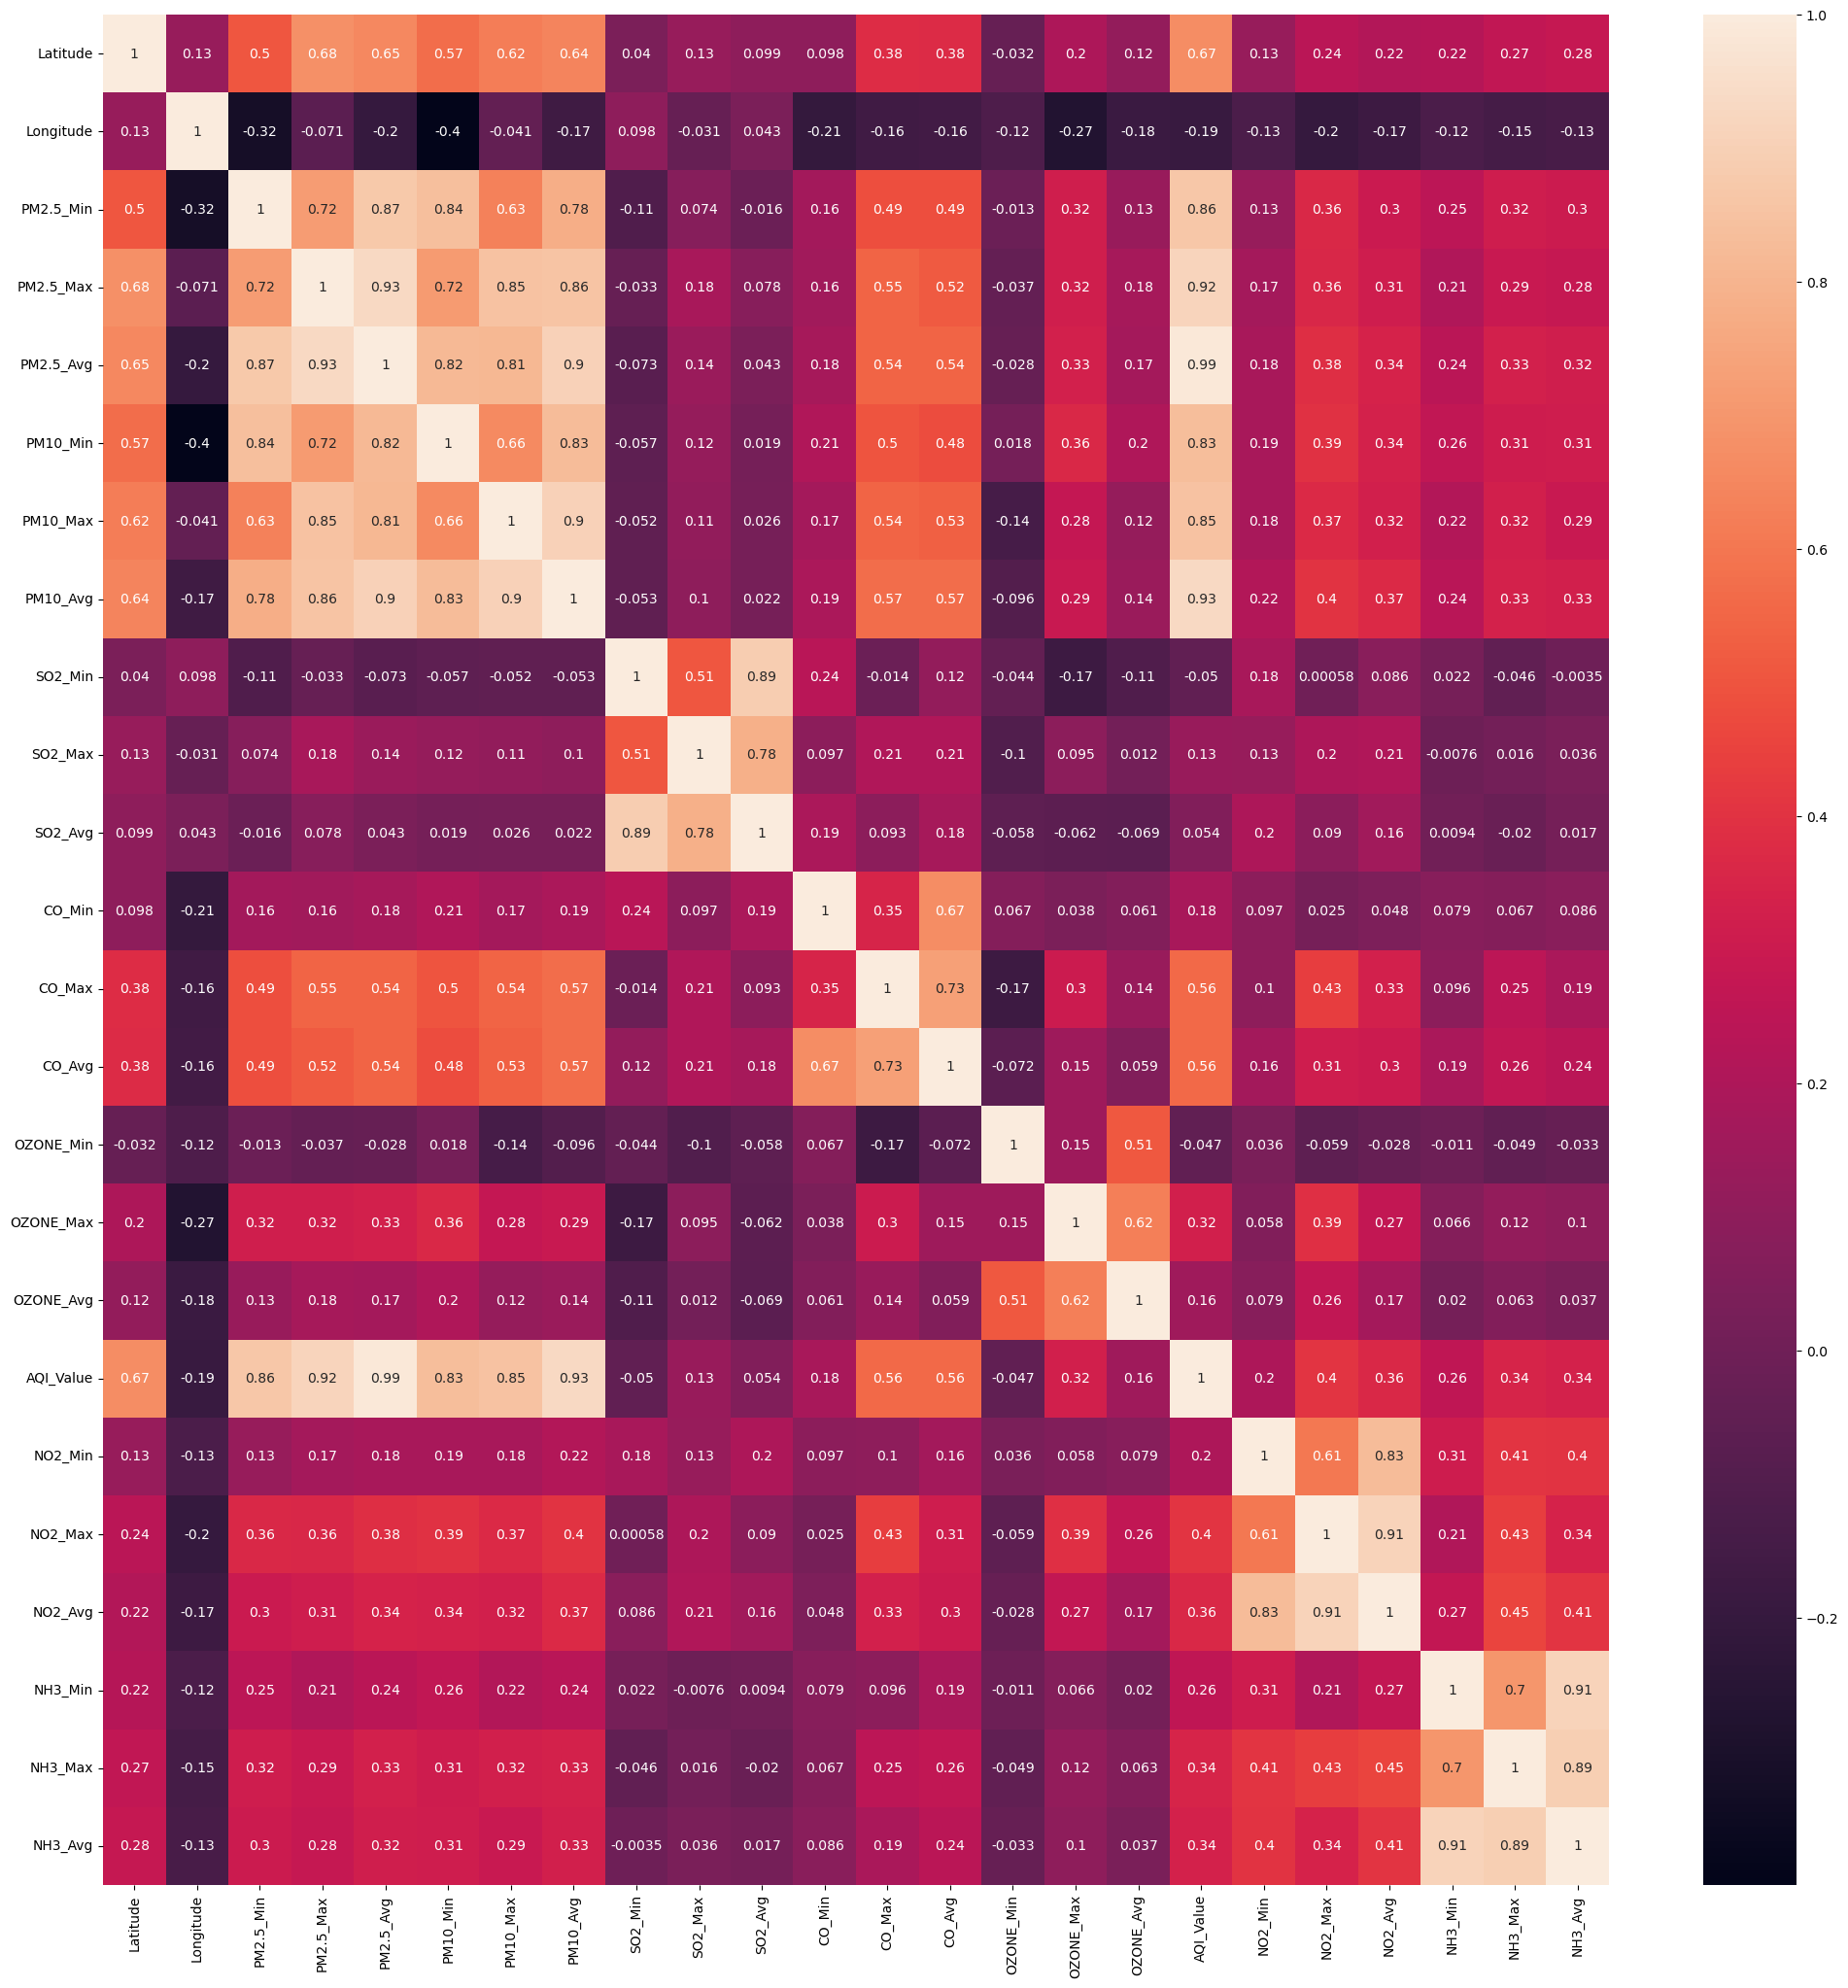

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.select_dtypes(include="number").corr(),annot=True)

<h1>Missing Value Treatments</h1>

Missing Data Summary:
                       Missing_Percentage
NH3_Avg                         20.121951
NH3_Max                         20.121951
NH3_Min                         20.121951
SO2_Min                         12.398374
SO2_Max                         12.398374
SO2_Avg                         12.398374
PM10_Min                        10.162602
PM10_Max                        10.162602
PM10_Avg                        10.162602
NO2_Avg                         10.162602
NO2_Max                         10.162602
NO2_Min                         10.162602
PM2.5_Min                        8.943089
PM2.5_Avg                        8.943089
PM2.5_Max                        8.943089
OZONE_Avg                        8.536585
OZONE_Min                        8.536585
OZONE_Max                        8.536585
Predominant_Parameter            7.723577
AQI_Value                        7.723577
CO_Avg                           6.707317
CO_Max                           6.707317
CO_Min      

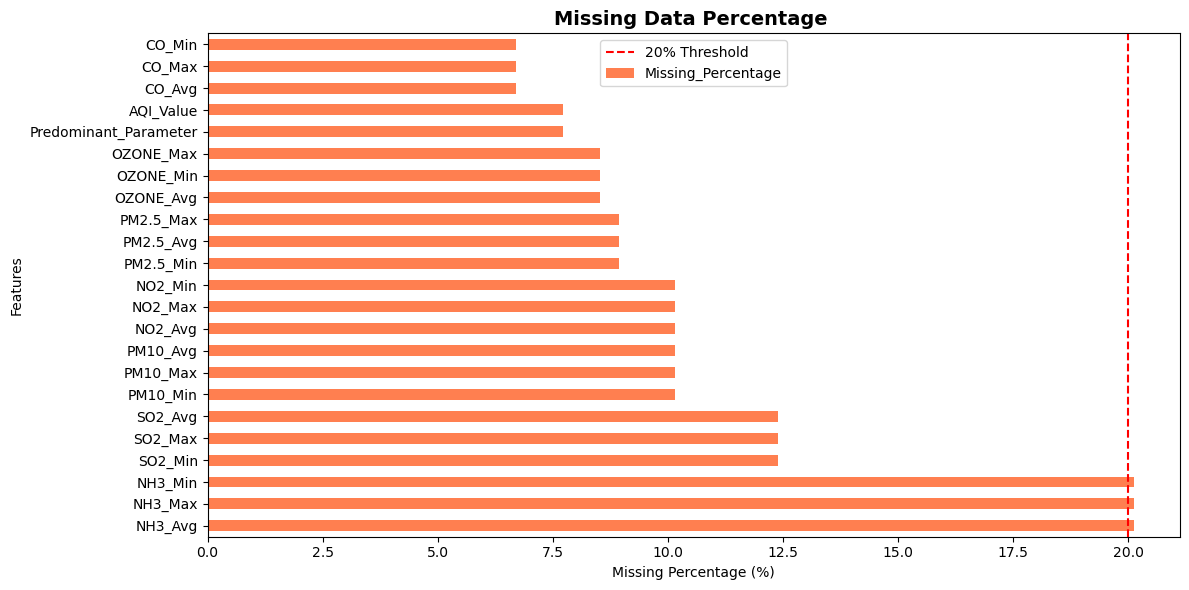

In [7]:
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_df = pd.DataFrame({'Missing_Percentage': missing_pct[missing_pct > 0]})

print("Missing Data Summary:")
print(missing_df)

# Visualize missing data
fig, ax = plt.subplots(figsize=(12, 6))
missing_df.plot(kind='barh', ax=ax, color='coral')
plt.title('Missing Data Percentage ', fontsize=14, fontweight='bold')
plt.xlabel('Missing Percentage (%)')
plt.ylabel('Features')
plt.axvline(x=20, color='red', linestyle='--', label='20% Threshold')
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
df_clean = df.copy()

# 1. Parse datetime
df_clean['Last_Update'] = pd.to_datetime(df_clean['Last_Update'],
                                         format='%d-%m-%Y %H:%M:%S',
                                         errors='coerce')
df_clean['Year'] = df_clean['Last_Update'].dt.year
df_clean['Month'] = df_clean['Last_Update'].dt.month
df_clean['Month_Name'] = df_clean['Last_Update'].dt.strftime('%B')

# 2. Drop NH3 columns (>20% missing)
df_clean = df_clean.drop(['NH3_Min', 'NH3_Max', 'NH3_Avg'], axis=1)
print("✅ Dropped NH3 columns (high missing rate)")

# 3. Impute missing values with median for numerical columns
pollutant_cols = [
    'PM2.5_Min', 'PM2.5_Max', 'PM2.5_Avg',
    'PM10_Min', 'PM10_Max', 'PM10_Avg',
    'SO2_Min', 'SO2_Max', 'SO2_Avg',
    'NO2_Min', 'NO2_Max', 'NO2_Avg',
    'CO_Min', 'CO_Max', 'CO_Avg',
    'OZONE_Min', 'OZONE_Max', 'OZONE_Avg',
    'AQI_Value'
]

for col in pollutant_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# 4. Fill categorical missing values (no inplace here)
if 'Predominant_Parameter' in df_clean.columns:
    df_clean['Predominant_Parameter'] = df_clean['Predominant_Parameter'].fillna('Unknown')

print("✅ Missing value imputation complete")
print("\nRemaining missing values:", df_clean.isnull().sum().sum())


✅ Dropped NH3 columns (high missing rate)
✅ Missing value imputation complete

Remaining missing values: 0


In [17]:
df_clean.to_csv("Output.csv")
df_clean.isnull().sum()


State                    0
City                     0
Station_Name             0
Last_Update              0
Latitude                 0
Longitude                0
PM2.5_Min                0
PM2.5_Max                0
PM2.5_Avg                0
PM10_Min                 0
PM10_Max                 0
PM10_Avg                 0
SO2_Min                  0
SO2_Max                  0
SO2_Avg                  0
CO_Min                   0
CO_Max                   0
CO_Avg                   0
OZONE_Min                0
OZONE_Max                0
OZONE_Avg                0
AQI_Value                0
Predominant_Parameter    0
NO2_Min                  0
NO2_Max                  0
NO2_Avg                  0
Year                     0
Month                    0
Month_Name               0
dtype: int64

<H1>Feature Engineering</H1>

In [10]:
def categorize_aqi(aqi):
    if pd.isna(aqi):
        return 'Unknown'
    elif aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

df_clean['AQI_Category'] = df_clean['AQI_Value'].apply(categorize_aqi)

# 2. Season classification (important for monsoon analysis)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Pre-Monsoon'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

df_clean['Season'] = df_clean['Month'].apply(get_season)

# 3. Pollution intensity score (composite metric)
df_clean['Pollution_Score'] = (
    df_clean['PM2.5_Avg'] * 0.3 + 
    df_clean['PM10_Avg'] * 0.25 + 
    df_clean['NO2_Avg'] * 0.2 + 
    df_clean['SO2_Avg'] * 0.15 + 
    df_clean['CO_Avg'] * 0.1
)

print("Feature engineering complete")
print(f"\nNew features: AQI_Category, Season, Pollution_Score")

Feature engineering complete

New features: AQI_Category, Season, Pollution_Score


In [24]:
df_clean.head()

,State,City,Station_Name,Last_Update,Latitude,Longitude,PM2.5_Min,PM2.5_Max,PM2.5_Avg,PM10_Min,...,Predominant_Parameter,NO2_Min,NO2_Max,NO2_Avg,Year,Month,Month_Name,AQI_Category,Season,Pollution_Score
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",2023-11-20 12:00:00,16.515083,80.518167,57.5,229.0,122.5,75.0,...,Unknown,14.0,40.5,26.0,2023,11,November,Moderate,Post-Monsoon,77.10
1,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",2023-11-20 12:00:00,14.675886,77.593027,15.0,34.0,24.0,16.0,...,CO,17.0,39.0,23.0,2023,11,November,Good,Post-Monsoon,21.75
2,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",2023-11-20 12:00:00,13.204880,79.097889,11.0,30.0,19.0,13.0,...,OZONE,8.0,21.0,14.0,2023,11,November,Good,Post-Monsoon,15.75
3,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",2023-11-20 12:00:00,14.465052,78.824187,19.0,57.0,37.0,18.0,...,PM2.5,21.0,54.0,30.0,2023,11,November,Good,Post-Monsoon,27.50
4,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",2023-11-20 12:00:00,16.987287,81.736318,31.0,72.0,44.0,43.0,...,PM10,12.0,26.0,18.0,2023,11,November,Satisfactory,Post-Monsoon,35.50


<H1>EDA of New Data</H1>

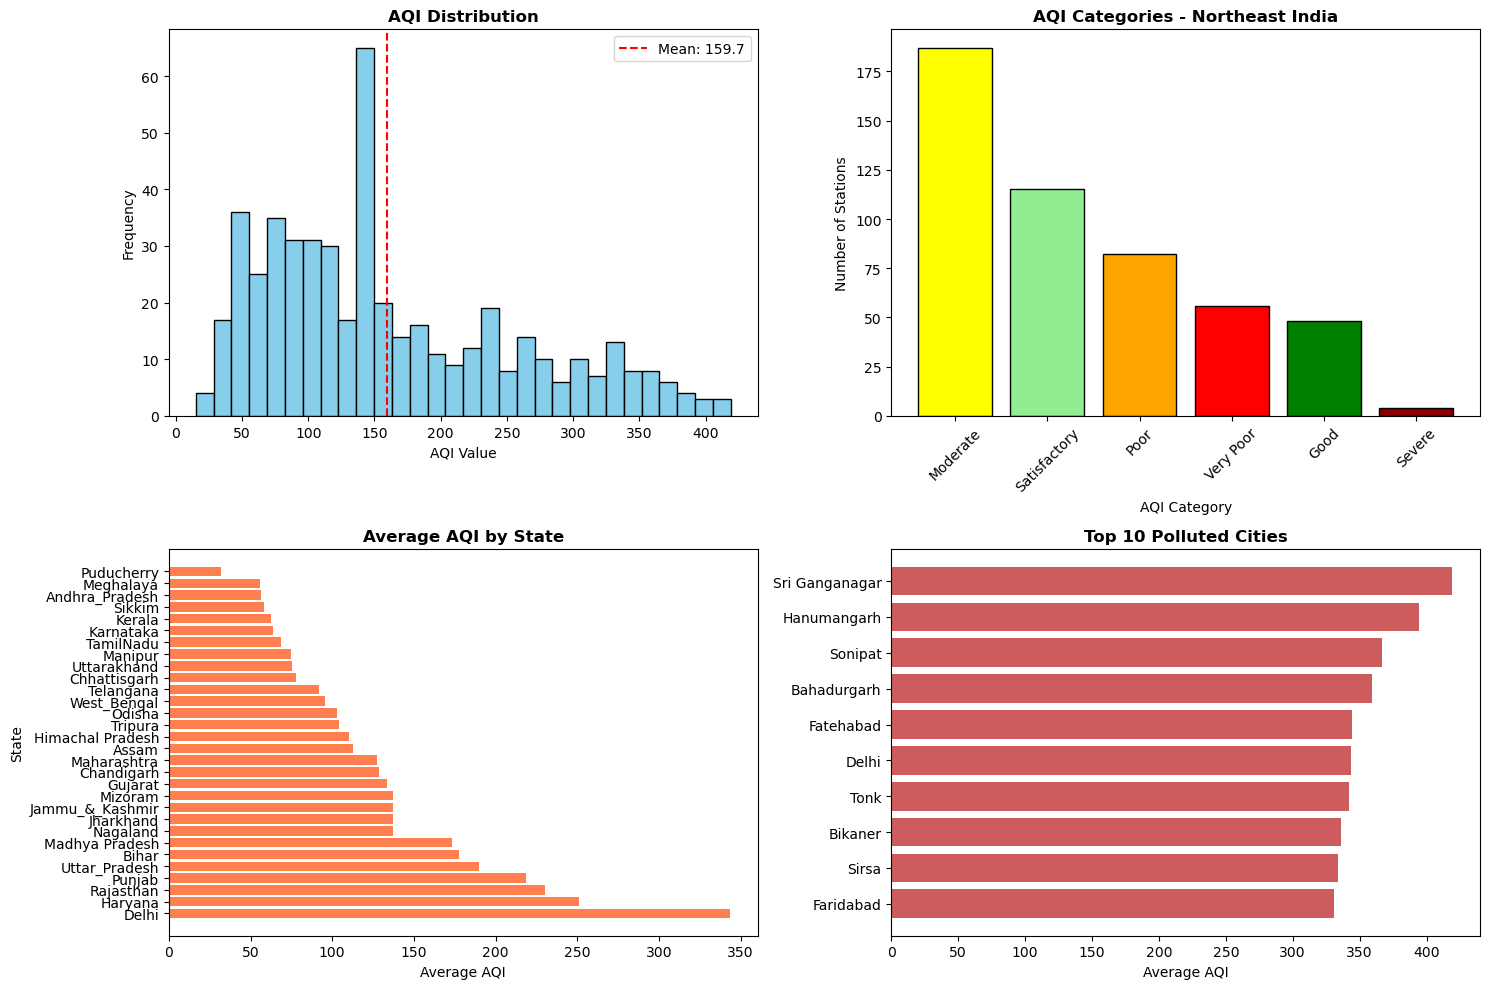

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. AQI Distribution
axes[0, 0].hist(df_clean['AQI_Value'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].axvline(df_clean['AQI_Value'].mean(), color='red', linestyle='--', label=f"Mean: {df_clean['AQI_Value'].mean():.1f}")
axes[0, 0].set_xlabel('AQI Value')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('AQI Distribution', fontweight='bold')
axes[0, 0].legend()

# 2. AQI by Category
category_counts = df_clean['AQI_Category'].value_counts()
colors = {'Good': 'green', 'Satisfactory': 'lightgreen', 'Moderate': 'yellow', 
          'Poor': 'orange', 'Very Poor': 'red', 'Severe': 'darkred'}
category_colors = [colors.get(cat, 'gray') for cat in category_counts.index]
axes[0, 1].bar(category_counts.index, category_counts.values, color=category_colors, edgecolor='black')
axes[0, 1].set_xlabel('AQI Category')
axes[0, 1].set_ylabel('Number of Stations')
axes[0, 1].set_title('AQI Categories - Northeast India', fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. AQI by State
state_aqi = df_clean.groupby('State')['AQI_Value'].mean().sort_values(ascending=False)
axes[1, 0].barh(state_aqi.index, state_aqi.values, color='coral')
axes[1, 0].set_xlabel('Average AQI')
axes[1, 0].set_ylabel('State')
axes[1, 0].set_title('Average AQI by State', fontweight='bold')

# 4. Top Polluted Cities
top_cities = df_clean.groupby('City')['AQI_Value'].mean().nlargest(10)
axes[1, 1].barh(range(len(top_cities)), top_cities.values, color='indianred')
axes[1, 1].set_yticks(range(len(top_cities)))
axes[1, 1].set_yticklabels(top_cities.index)
axes[1, 1].set_xlabel('Average AQI')
axes[1, 1].set_title('Top 10 Polluted Cities', fontweight='bold')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

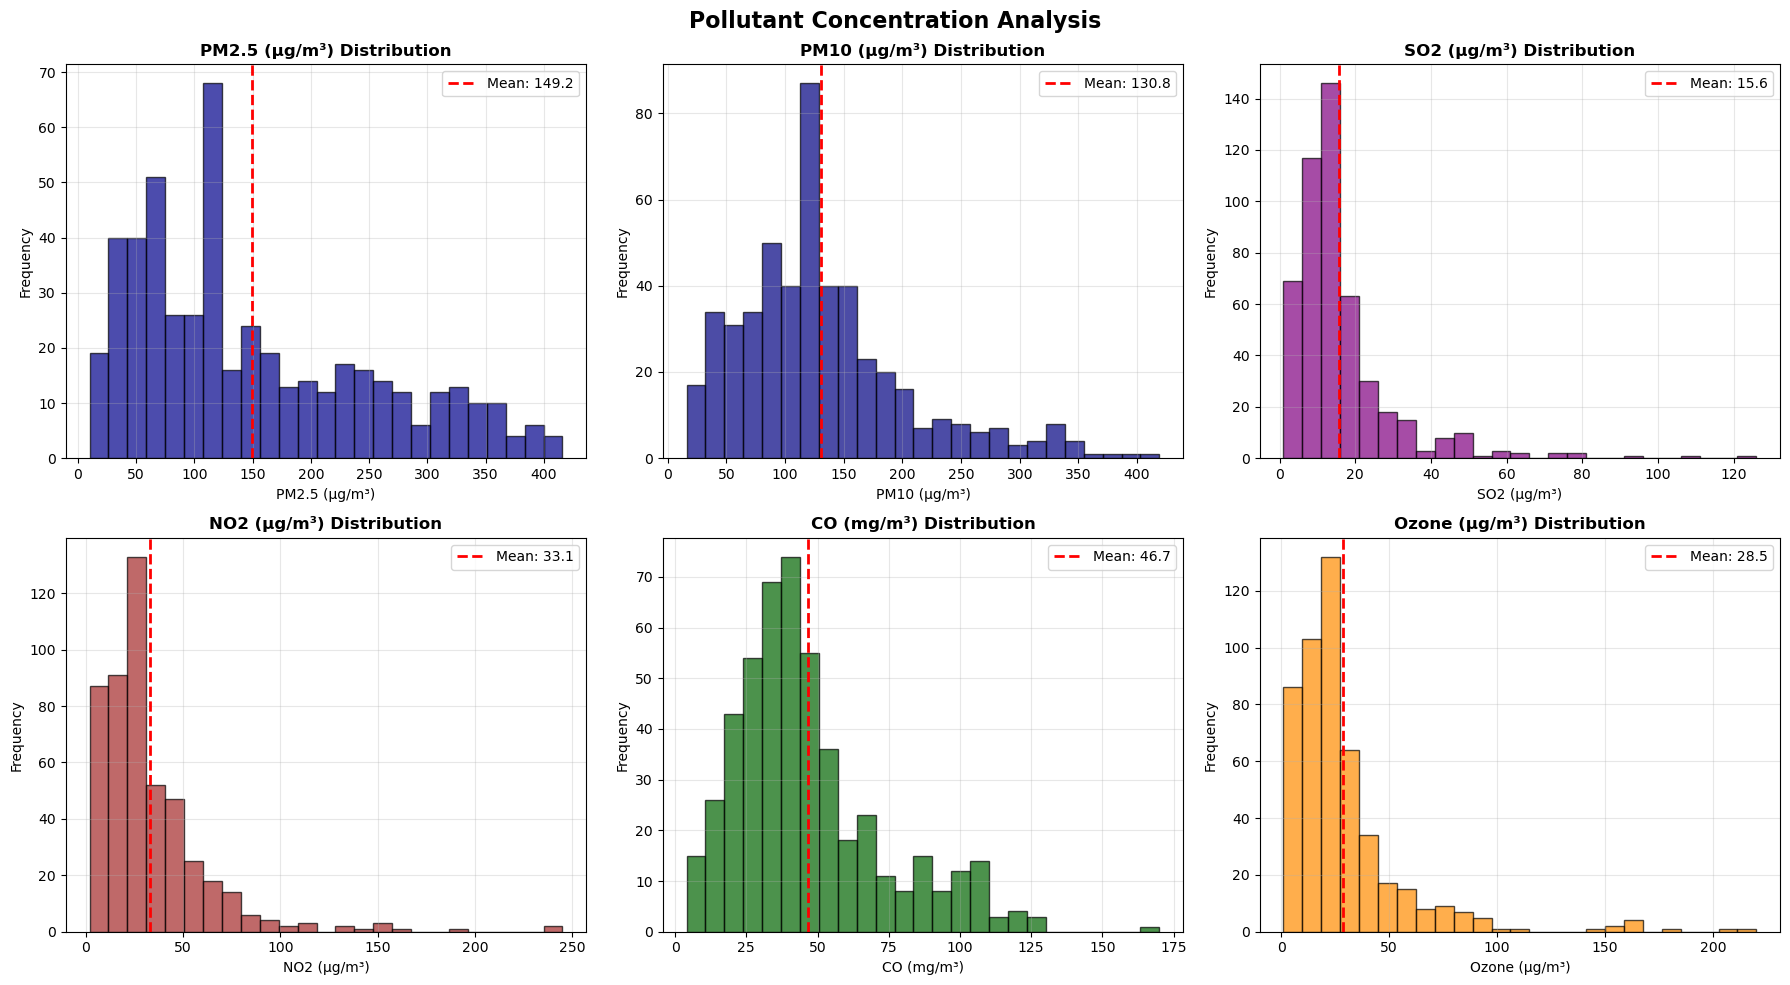

In [31]:
# Pollutant Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Pollutant Concentration Analysis', fontsize=16, fontweight='bold')

pollutants = [
    ('PM2.5_Avg', 'PM2.5 (μg/m³)', 'darkblue'),
    ('PM10_Avg', 'PM10 (μg/m³)', 'navy'),
    ('SO2_Avg', 'SO2 (μg/m³)', 'purple'),
    ('NO2_Avg', 'NO2 (μg/m³)', 'brown'),
    ('CO_Avg', 'CO (mg/m³)', 'darkgreen'),
    ('OZONE_Avg', 'Ozone (μg/m³)', 'darkorange')
]

for idx, (col, label, color) in enumerate(pollutants):
    ax = axes[idx // 3, idx % 3]
    ax.hist(df_clean[col].dropna(), bins=25, color=color, alpha=0.7, edgecolor='black')
    ax.axvline(df_clean[col].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df_clean[col].mean():.1f}")
    ax.set_xlabel(label)
    ax.set_ylabel('Frequency')
    ax.set_title(f'{label} Distribution', fontweight='bold')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Correlation Heatmap for Pollutants

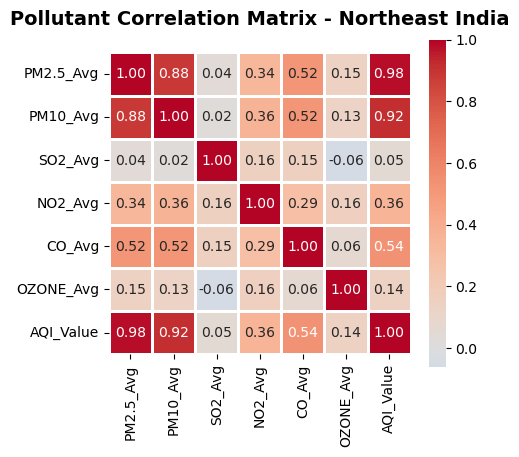


🔍 KEY CORRELATION INSIGHTS:
PM2.5_Avg ↔ PM10_Avg: 0.884
PM2.5_Avg ↔ AQI_Value: 0.983
PM10_Avg ↔ AQI_Value: 0.918


In [34]:

pollutant_cols_for_corr = ['PM2.5_Avg', 'PM10_Avg', 'SO2_Avg', 'NO2_Avg', 'CO_Avg', 'OZONE_Avg', 'AQI_Value']
corr_matrix = df_clean[pollutant_cols_for_corr].corr()

plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Pollutant Correlation Matrix - Northeast India', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Key findings
print("\n🔍 KEY CORRELATION INSIGHTS:")
print("="*60)
high_corr = corr_matrix.abs() > 0.7
for i in range(len(corr_matrix)):
    for j in range(i+1, len(corr_matrix)):
        if high_corr.iloc[i, j]:
            print(f"{corr_matrix.index[i]} ↔ {corr_matrix.columns[j]}: {corr_matrix.iloc[i,j]:.3f}")

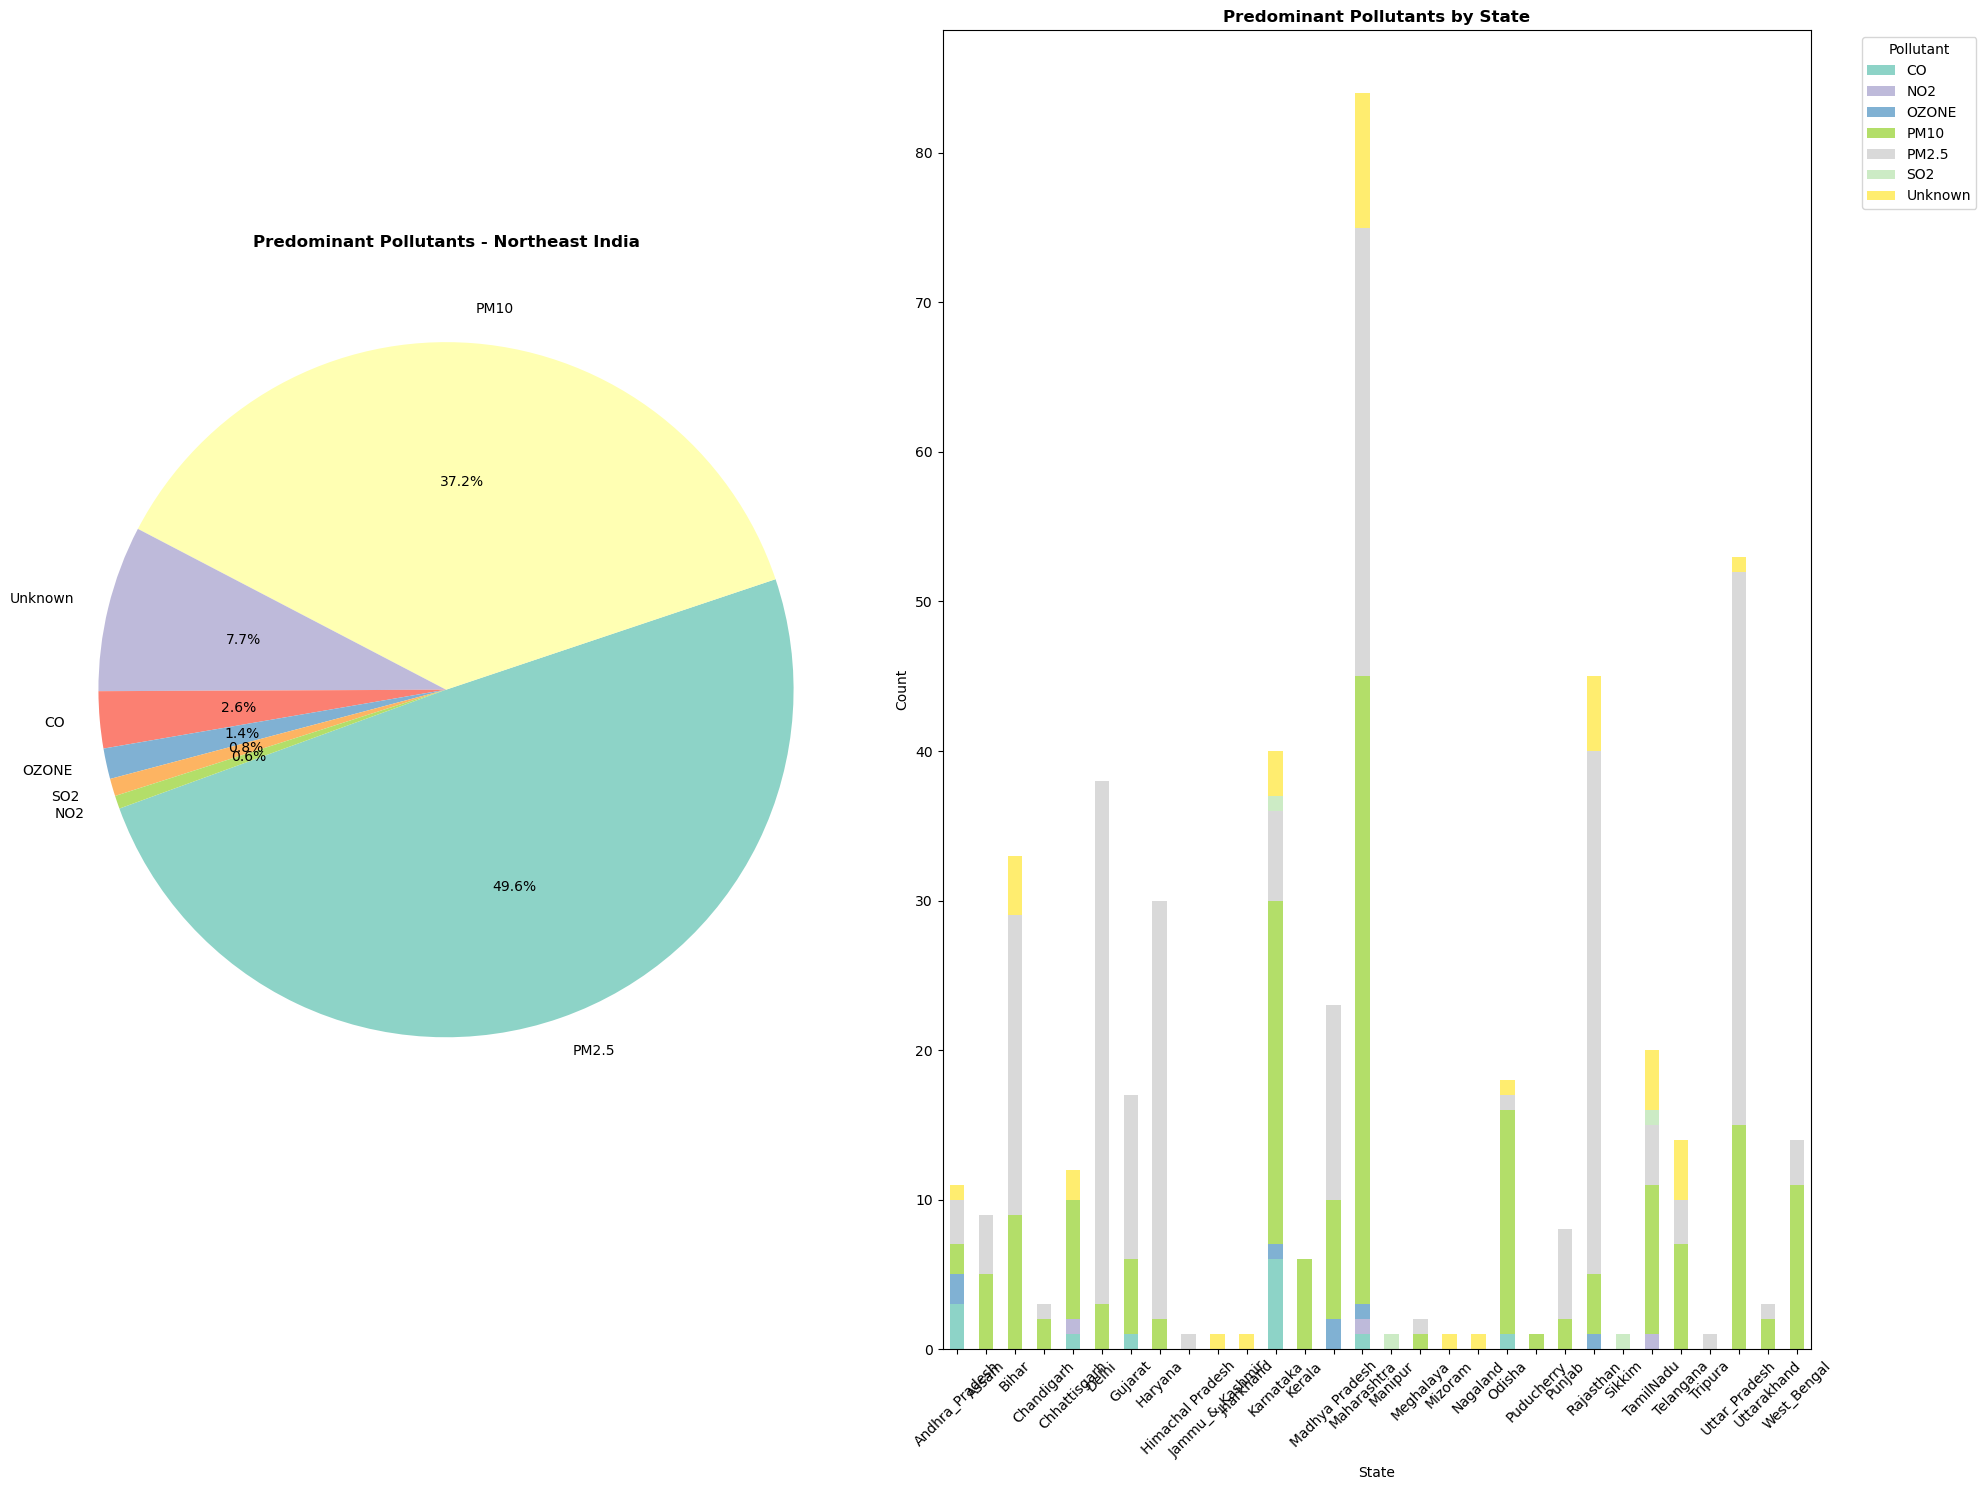

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(20, 15))

# Overall distribution
param_counts = df_clean['Predominant_Parameter'].value_counts()
axes[0].pie(param_counts.values, labels=param_counts.index, autopct='%1.1f%%', 
            startangle=200, colors=sns.color_palette('Set3'))
axes[0].set_title('Predominant Pollutants - Northeast India', fontweight='bold', fontsize=12)

# By State
state_param = pd.crosstab(df_clean['State'], df_clean['Predominant_Parameter'])
state_param.plot(kind='bar', stacked=True, ax=axes[1], colormap='Set3')
axes[1].set_title('Predominant Pollutants by State', fontweight='bold', fontsize=12)
axes[1].set_xlabel('State')
axes[1].set_ylabel('Count')
axes[1].legend(title='Pollutant', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

OVERALL AIR QUALITY


In [22]:
print("="*50)
print("KEY FINDINGS - INDIA AIR QUALITY")
print("="*50)

print("\nOVERALL AIR QUALITY:")
print(f"   • Average AQI: {df_clean['AQI_Value'].mean():.1f}")
print(f"   • Median AQI: {df_clean['AQI_Value'].median():.1f}")
print(f"   • Stations with Good AQI (≤50): {(df_clean['AQI_Value'] <= 50).sum()} ({(df_clean['AQI_Value'] <= 50).sum()/len(df_clean)*100:.1f}%)")
print(f"   • Stations with Poor+ AQI (>200): {(df_clean['AQI_Value'] > 200).sum()} ({(df_clean['AQI_Value'] > 200).sum()/len(df_clean)*100:.1f}%)")

print("\nPREDOMINANT POLLUTANTS:")
top_pollutants = df_clean['Predominant_Parameter'].value_counts().head(3)
for idx, (pollutant, count) in enumerate(top_pollutants.items(), 1):
    print(f"   {idx}. {pollutant}: {count} stations ({count/len(df_clean)*100:.1f}%)")

print("\nMOST POLLUTED AREAS:")
top_3_cities = df_clean.groupby('City')['AQI_Value'].mean().nlargest(3)
for idx, (city, aqi) in enumerate(top_3_cities.items(), 1):
    state = df_clean[df_clean['City'] == city]['State'].values[0]
    print(f"   {idx}. {city}, {state}: AQI {aqi:.1f}")

print("\nCLEANEST AREAS:")
bottom_3_cities = df_clean.groupby('City')['AQI_Value'].mean().nsmallest(3)
for idx, (city, aqi) in enumerate(bottom_3_cities.items(), 1):
    state = df_clean[df_clean['City'] == city]['State'].values[0]
    print(f"   {idx}. {city}, {state}: AQI {aqi:.1f}")

print("\nPOLLUTANT STATISTICS :")
print(f"   • PM2.5: {df_clean['PM2.5_Avg'].mean():.1f} ± {df_clean['PM2.5_Avg'].std():.1f} μg/m³")
print(f"   • PM10:  {df_clean['PM10_Avg'].mean():.1f} ± {df_clean['PM10_Avg'].std():.1f} μg/m³")
print(f"   • SO2:   {df_clean['SO2_Avg'].mean():.1f} ± {df_clean['SO2_Avg'].std():.1f} μg/m³")
print(f"   • NO2:   {df_clean['NO2_Avg'].mean():.1f} ± {df_clean['NO2_Avg'].std():.1f} μg/m³")
print(f"   • CO:    {df_clean['CO_Avg'].mean():.1f} ± {df_clean['CO_Avg'].std():.1f} mg/m³")

print("\n" + "="*50)
print("RECOMMENDATIONS FOR ML MODEL DEVELOPMENT")
print("="*50)
print("\nFeature Selection Priorities:")
print("   1. PM2.5 and PM10 (highest correlation with AQI)")
print("   2. Geographic features (State, City coordinates)")
print("   3. Consider temporal features if time-series data available")

print("\nModel Suggestions:")
print("   • Random Forest / Gradient Boosting for AQI prediction")
print("   • Feature importance analysis for pollutant contribution")
print("   • Regional models for Agartala/Meghalaya specific patterns")

KEY FINDINGS - INDIA AIR QUALITY

OVERALL AIR QUALITY:
   • Average AQI: 159.7
   • Median AQI: 137.0
   • Stations with Good AQI (≤50): 48 (9.8%)
   • Stations with Poor+ AQI (>200): 142 (28.9%)

PREDOMINANT POLLUTANTS:
   1. PM2.5: 244 stations (49.6%)
   2. PM10: 183 stations (37.2%)
   3. Unknown: 38 stations (7.7%)

MOST POLLUTED AREAS:
   1. Sri Ganganagar, Rajasthan: AQI 419.0
   2. Hanumangarh, Rajasthan: AQI 394.0
   3. Sonipat, Haryana: AQI 367.0

CLEANEST AREAS:
   1. Ramanathapuram, TamilNadu: AQI 15.0
   2. Thoothukudi, TamilNadu: AQI 20.0
   3. Anantapur, Andhra_Pradesh: AQI 29.0

POLLUTANT STATISTICS :
   • PM2.5: 149.2 ± 101.3 μg/m³
   • PM10:  130.8 ± 72.6 μg/m³
   • SO2:   15.6 ± 14.1 μg/m³
   • NO2:   33.1 ± 29.2 μg/m³
   • CO:    46.7 ± 26.5 mg/m³

RECOMMENDATIONS FOR ML MODEL DEVELOPMENT

Feature Selection Priorities:
   1. PM2.5 and PM10 (highest correlation with AQI)
   2. Geographic features (State, City coordinates)
   3. Consider temporal features if time-seri

<h1>Prepare Dataset for Model</h1>

In [20]:
Output = "Output.csv"
df_clean.to_csv(Output, index=False)
print(f"\n✅ Clean dataset exported: {Output}")
print(f"   Shape: {df_clean.shape}")
print(f"   Features: {df_clean.shape[1]}")
print(f"   Records: {df_clean.shape[0]}")

# Summary statistics export
summary_stats = df_clean.describe().T
summary_stats.to_csv('summary_statistics.csv')
print(f"\n✅ Summary statistics exported: summary_statistics.csv")


✅ Clean dataset exported: Output.csv
   Shape: (492, 29)
   Features: 29
   Records: 492

✅ Summary statistics exported: summary_statistics.csv
